# Problem Statement

- **DOMAIN:** Electronics and Telecommunication
- **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
- **DATA DESCRIPTION:** The data set contains information on various signal tests performed:
    1. Parameters: Various measurable signal parameters.
    2. Signal_Quality: Final signal strength or quality        
- **PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

In [1]:
# Importing Key Libraries

import numpy as np

import pandas as pd

#

import warnings; warnings.simplefilter('ignore')

# 
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

In [2]:
import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [3]:
df=pd.read_csv("Signal.csv")  

df.head()  

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0         7.40         0.70         0.00         1.90         0.08   
1         7.80         0.88         0.00         2.60         0.10   
2         7.80         0.76         0.04         2.30         0.09   
3        11.20         0.28         0.56         1.90         0.07   
4         7.40         0.70         0.00         1.90         0.08   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0        11.00        34.00         1.00         3.51          0.56   
1        25.00        67.00         1.00         3.20          0.68   
2        15.00        54.00         1.00         3.26          0.65   
3        17.00        60.00         1.00         3.16          0.58   
4        11.00        34.00         1.00         3.51          0.56   

   Parameter 11  Signal_Strength  
0          9.40                5  
1          9.80                5  
2          9.80                5  
3          9.80                6  
4          9.40                5

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df['Signal_Strength'].tail()

1594    5
1595    6
1596    6
1597    5
1598    6
Name: Signal_Strength, dtype: int64

In [8]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [9]:
for i,j in enumerate(df.columns):
    print('Percentage of missing values in column {0} is:{1}%'.format( j,( df[j].isnull().sum() * 100/ df.shape[1] )))

Percentage of missing values in column Parameter 1 is:0.0%
Percentage of missing values in column Parameter 2 is:0.0%
Percentage of missing values in column Parameter 3 is:0.0%
Percentage of missing values in column Parameter 4 is:0.0%
Percentage of missing values in column Parameter 5 is:0.0%
Percentage of missing values in column Parameter 6 is:0.0%
Percentage of missing values in column Parameter 7 is:0.0%
Percentage of missing values in column Parameter 8 is:0.0%
Percentage of missing values in column Parameter 9 is:0.0%
Percentage of missing values in column Parameter 10 is:0.0%
Percentage of missing values in column Parameter 11 is:0.0%
Percentage of missing values in column Signal_Strength is:0.0%


**There are no missing values in any of the attributes**

In [10]:
df.duplicated().sum()

240

In [11]:
duplicates = df[df.duplicated(keep=False)]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0            7.40         0.70         0.00         1.90         0.08   
4            7.40         0.70         0.00         1.90         0.08   
9            7.50         0.50         0.36         6.10         0.07   
11           7.50         0.50         0.36         6.10         0.07   
22           7.90         0.43         0.21         1.60         0.11   
...           ...          ...          ...          ...          ...   
1567         7.20         0.69         0.13         2.00         0.08   
1579         6.20         0.56         0.09         1.70         0.05   
1581         6.20         0.56         0.09         1.70         0.05   
1592         6.30         0.51         0.13         2.30         0.08   
1596         6.30         0.51         0.13         2.30         0.08   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0           11.00        34.00   

**There are duplicates in the dataframe. We'll drop the duplicate rows to avoid overfitting**

In [12]:
df_new = df.drop_duplicates()
df_new.shape

(1359, 12)

<Axes: xlabel='Signal_Strength', ylabel='count'>

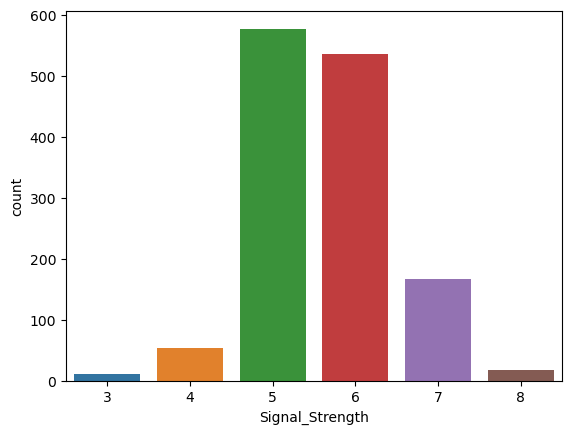

In [13]:
sns.countplot(data=df_new,x='Signal_Strength')

<Axes: xlabel='Signal_Strength', ylabel='Density'>

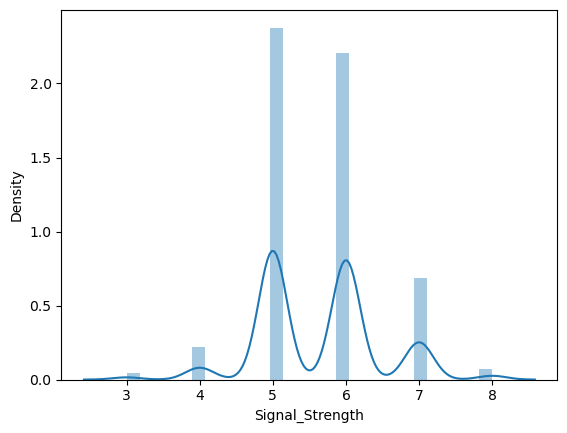

In [14]:
sns.distplot(df_new['Signal_Strength'])

### Observations:

- Class 5 and 6 are the most common classes in signal strength, followed by 7
- Class 3, 4 and 8 are minority classes

**Boxplot to analyze on outliers**

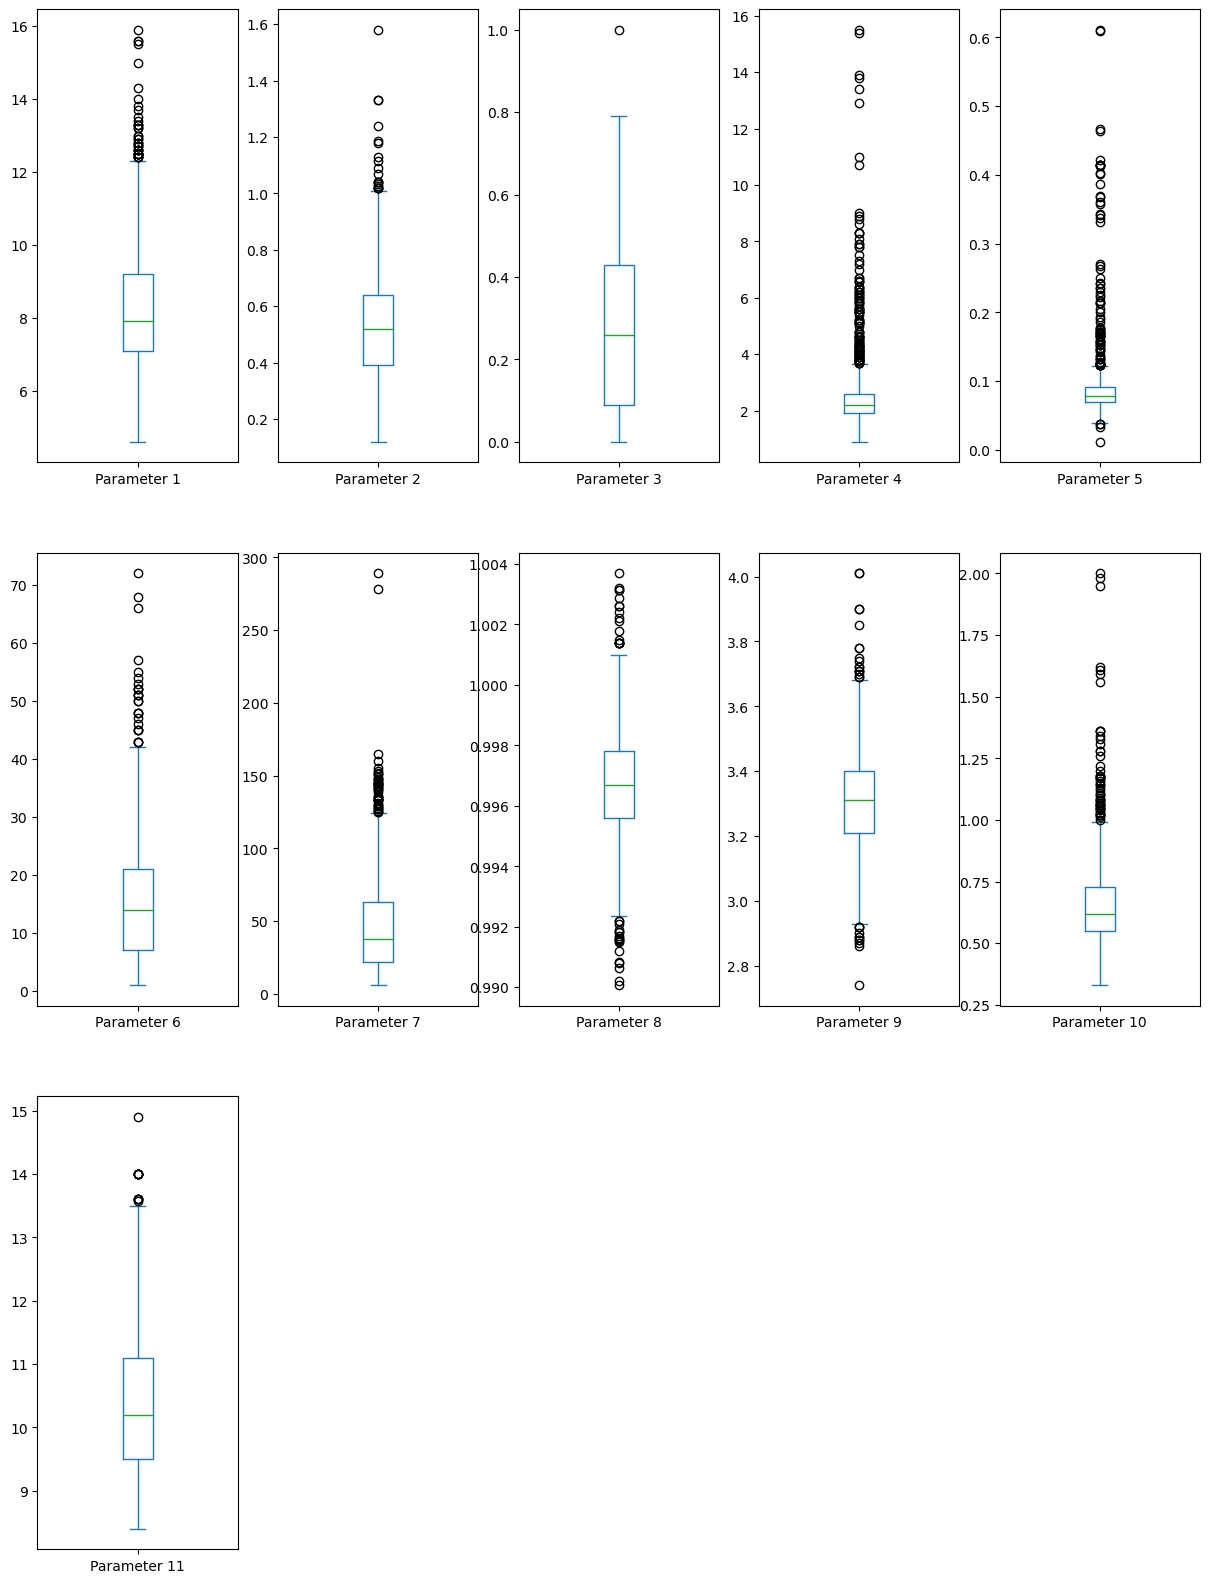

In [15]:
_=df_new.iloc[:,0:11].plot(kind='box', layout=(3,5), subplots=True, figsize=(15,20))

**We see there are many outliers in the input features, but we'll not apply outlier treatment as the data points may represent the actual signal data. Outlier Treatment should be confirmed by Domain experts to be applied.**

**Checking distribution of the input parameters**

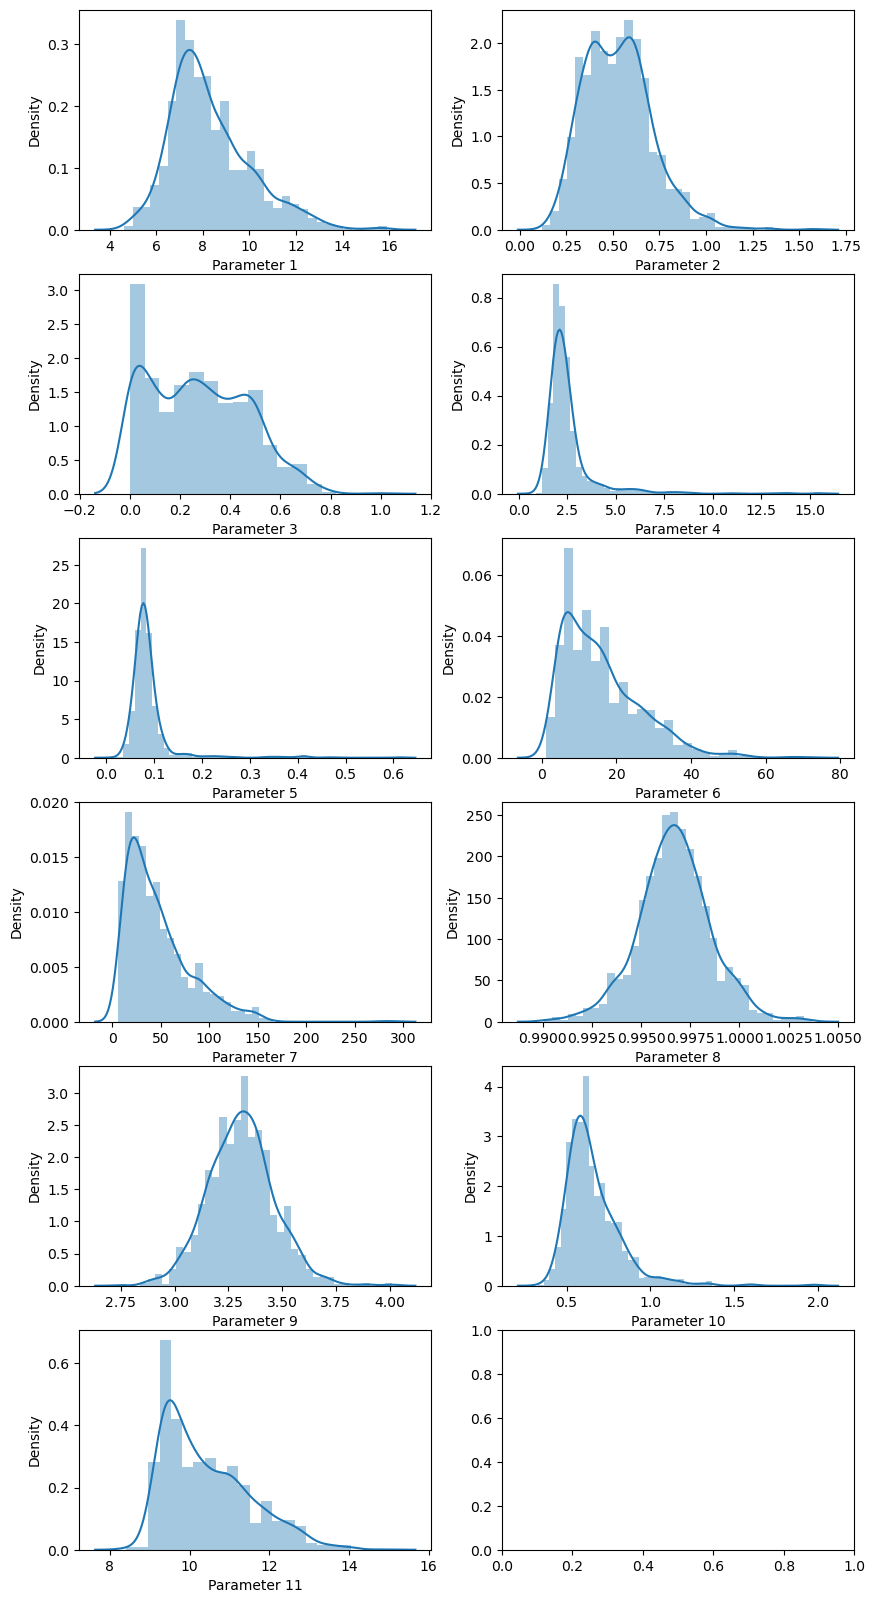

In [16]:
fig, ax = plt.subplots(ncols=2,nrows=6,figsize=(10,20))
_=sns.distplot(df_new.iloc[:,0],ax=ax[0,0])
_=sns.distplot(df_new.iloc[:,1],ax=ax[0,1])
_=sns.distplot(df_new.iloc[:,2],ax=ax[1,0])
_=sns.distplot(df_new.iloc[:,3],ax=ax[1,1])
_=sns.distplot(df_new.iloc[:,4],ax=ax[2,0])
_=sns.distplot(df_new.iloc[:,5],ax=ax[2,1])
_=sns.distplot(df_new.iloc[:,6],ax=ax[3,0])
_=sns.distplot(df_new.iloc[:,7],ax=ax[3,1])
_=sns.distplot(df_new.iloc[:,8],ax=ax[4,0])
_=sns.distplot(df_new.iloc[:,9],ax=ax[4,1])
_=sns.distplot(df_new.iloc[:,10],ax=ax[5,0])

**We'll check the pairplot to understand the relation between the input parameters**

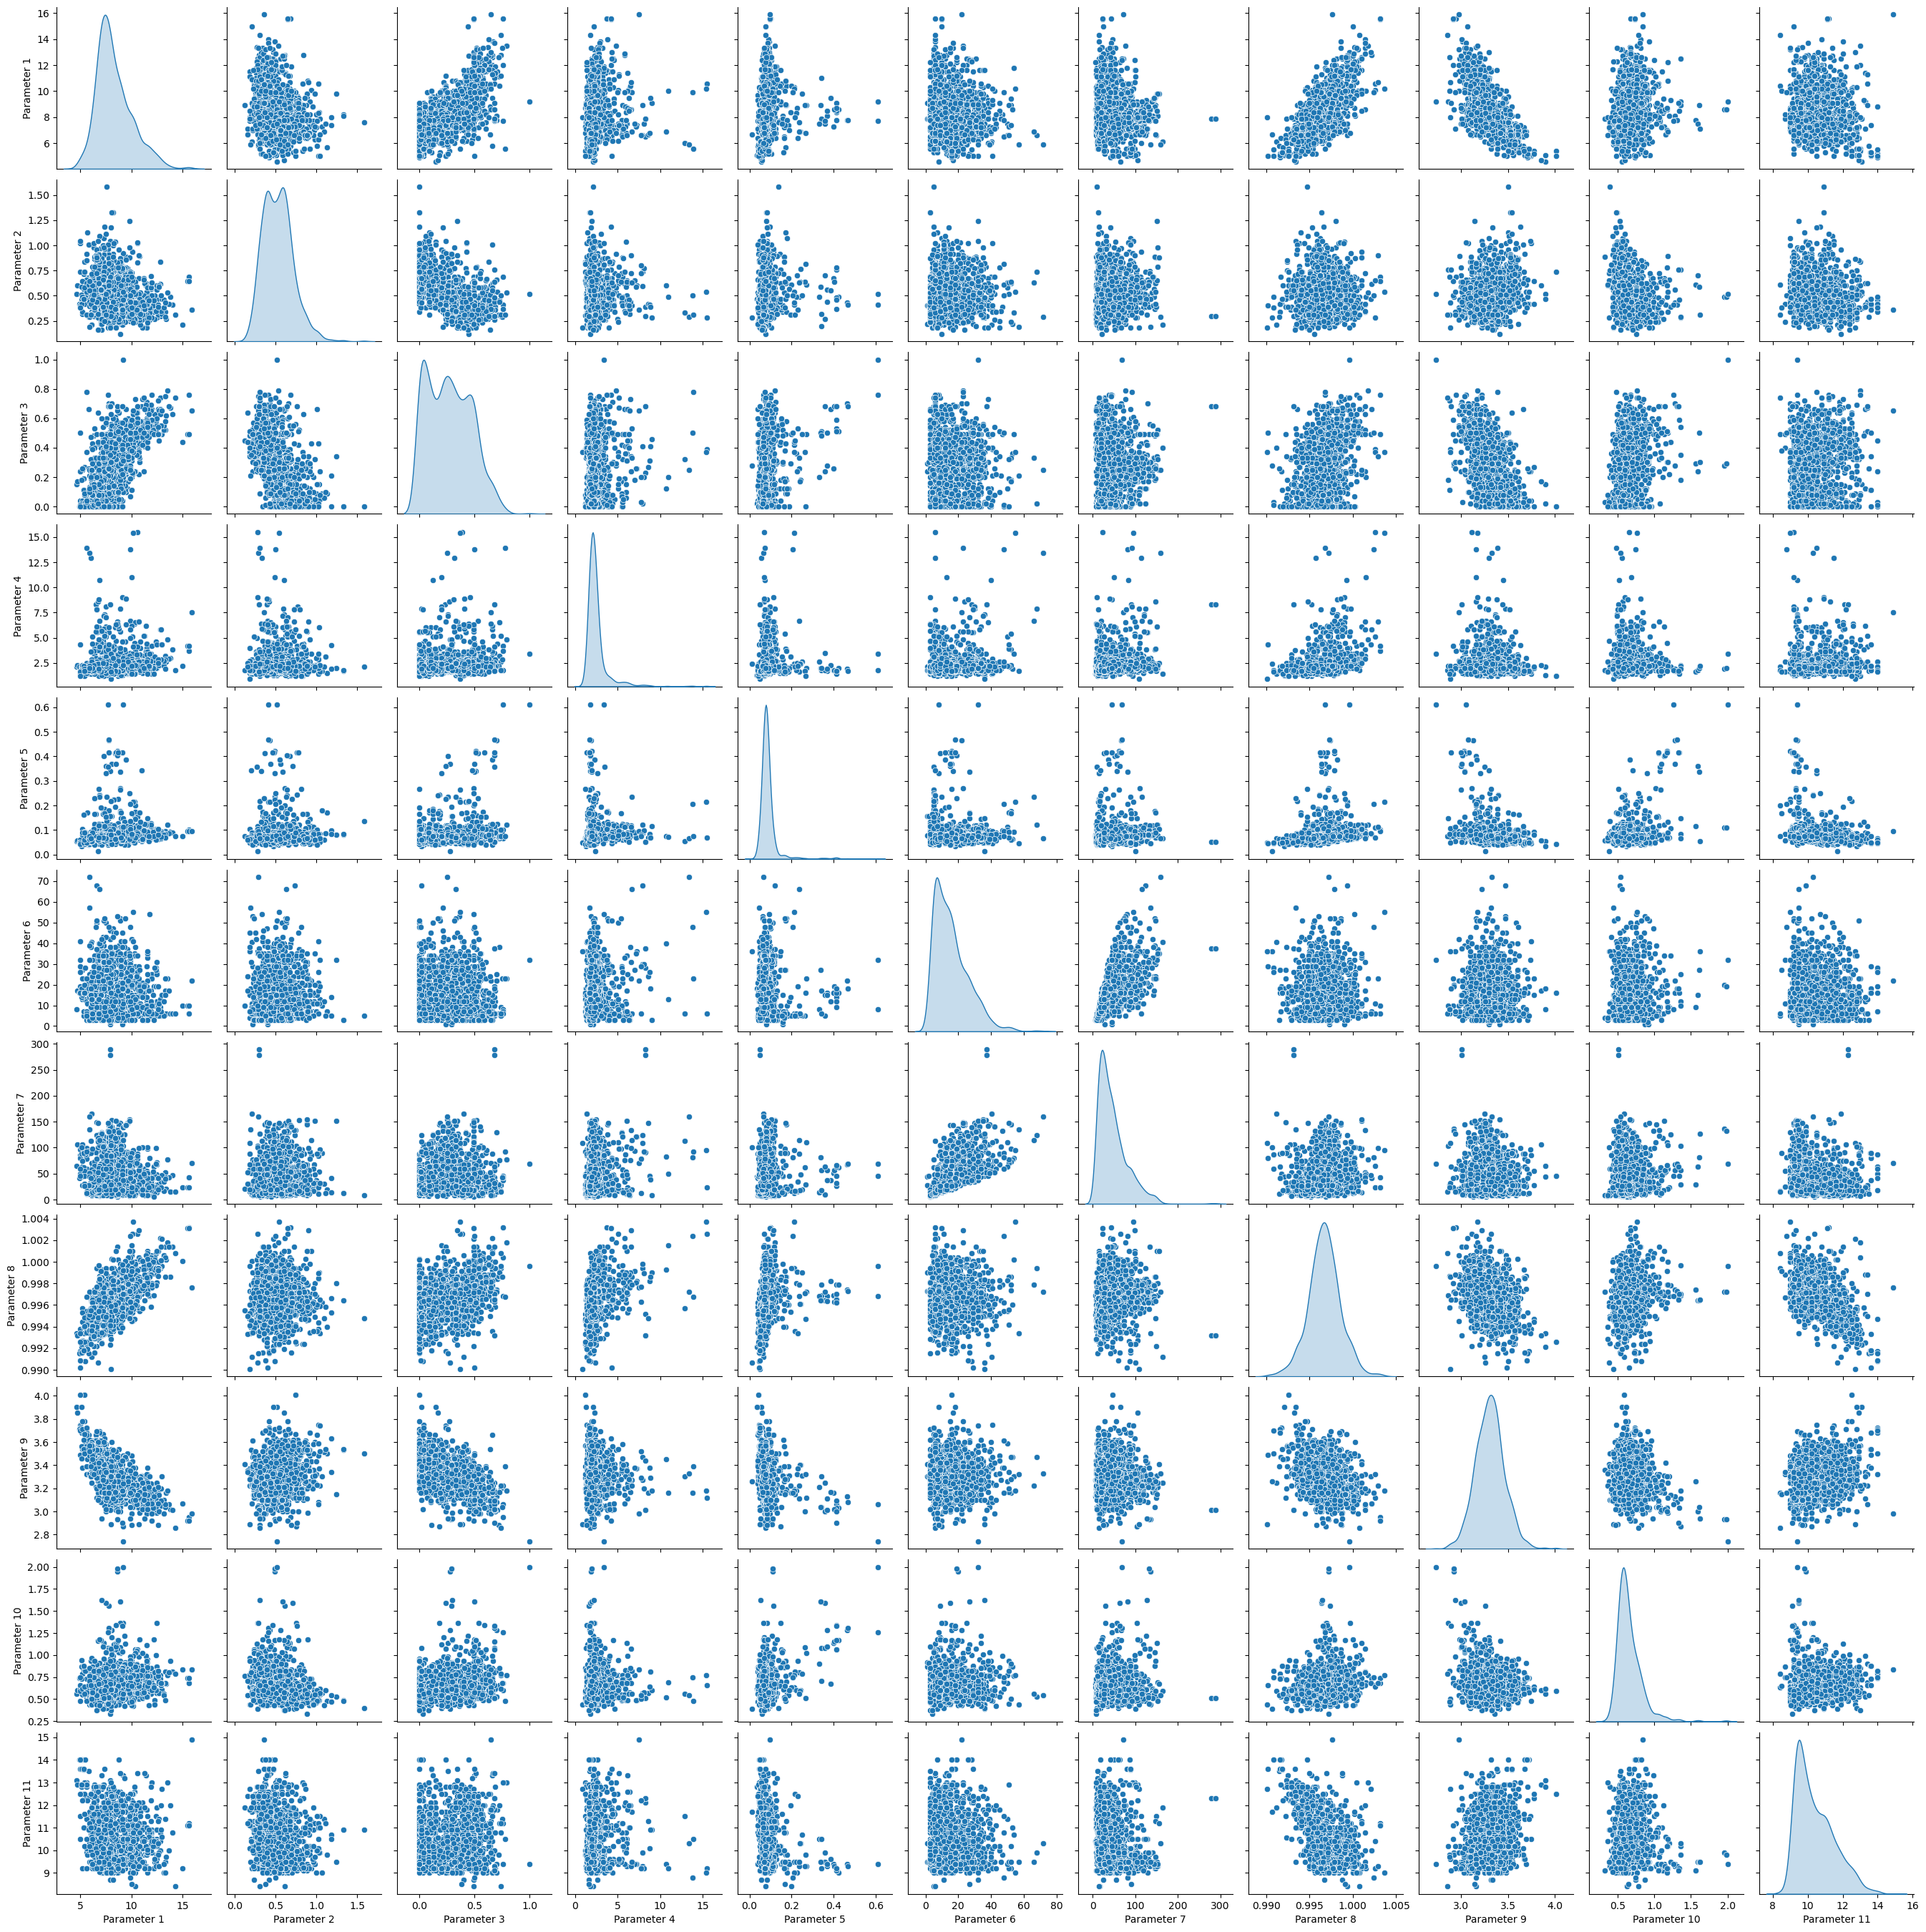

In [17]:
sns.pairplot(df_new.iloc[:,0:11],diag_kind="kde")

**Heatmap**

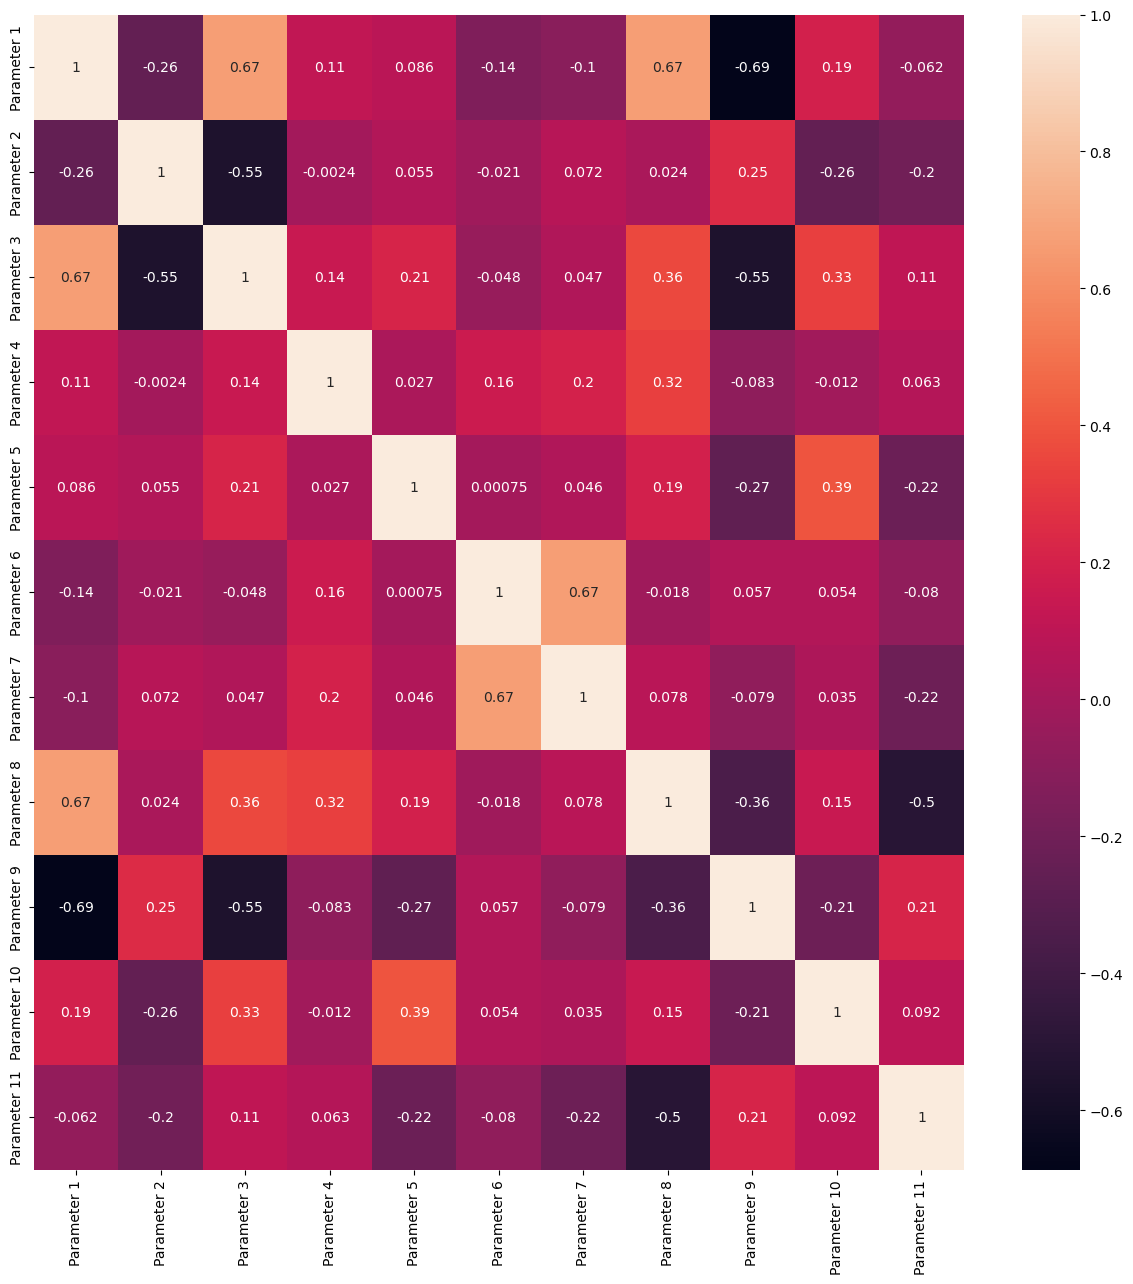

In [18]:
_=plt.figure(figsize=(15,15))
_=sns.heatmap(df_new.iloc[:,0:11].corr(), annot=True )
_=plt.show()

**No extreme correlated features observed**

### Observations:

- There are many outliers in most of the input features. But we'll not treat them as they may be genuine data points important for training the model. Outlier treatment, if required should be specified by a Domain expert
- The input features are not highly correlated. The highest correlation observed is -0.69, which is within acceptable range
- Parameter 2 shows bimodal distribution
- Parameter 3 shows multi-modal distribution
- Parameter 1, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 10 and Parameter 11 show an almost normal distribution, with slight right skew
- Parameter 8 and Parameter 9 are almost having normal distribution

In [19]:
X=df_new.drop('Signal_Strength',axis=1)      

Y=df_new['Signal_Strength'] 

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, Y, train_size=0.7, random_state=9)

In [21]:
print('Shape of x_train: ',x_train.shape,)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (951, 11)
Shape of y_train:  (951,)
Shape of x_test:  (408, 11)
Shape of y_test:  (408,)


In [22]:
print("Training set statistics:")
x_train.describe()

# Summary statistics for test set
print("\nTest set statistics:")
x_test.describe()

Training set statistics:


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count       951.00       951.00       951.00       951.00       951.00   
mean          8.32         0.53         0.27         2.50         0.09   
std           1.75         0.18         0.20         1.30         0.05   
min           4.60         0.12         0.00         1.20         0.01   
25%           7.10         0.39         0.09         1.90         0.07   
50%           7.90         0.51         0.26         2.20         0.08   
75%           9.20         0.63         0.44         2.60         0.09   
max          15.90         1.58         0.79        15.50         0.47   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count       951.00       951.00       951.00       951.00        951.00   
mean         16.00        46.12         1.00         3.31          0.66   
std          10.60        32.87         0.00         0.15          0.16   
min           1.00         6.00         0.99         2.87          0.33   
25%           7.00        21.00         1.00         3.21          0.56   
50%          14.00        38.00         1.00         3.32          0.62   
75%          22.00        62.00         1.00         3.41          0.73   
max          68.00       278.00         1.00         4.01          1.98   

       Parameter 11  
count        951.00  
mean          10.47  
std            1.09  
min            8.50  
25%            9.50  
50%           10.20  
75%           11.20  
max           14.90


Test set statistics:


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count       408.00       408.00       408.00       408.00       408.00   
mean          8.29         0.54         0.27         2.57         0.09   
std           1.72         0.18         0.19         1.47         0.06   
min           4.70         0.16         0.00         0.90         0.04   
25%           7.10         0.40         0.10         1.90         0.07   
50%           7.90         0.54         0.26         2.20         0.08   
75%           9.22         0.66         0.40         2.60         0.09   
max          15.60         1.07         1.00        13.80         0.61   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count       408.00       408.00       408.00       408.00        408.00   
mean         15.66        48.48         1.00         3.30          0.66   
std          10.09        34.62         0.00         0.16          0.19   
min           1.00         7.00         0.99         2.74          0.39   
25%           8.00        24.00         1.00         3.20          0.54   
50%          14.00        38.00         1.00         3.30          0.61   
75%          20.00        65.00         1.00         3.39          0.72   
max          72.00       289.00         1.00         3.85          2.00   

       Parameter 11  
count        408.00  
mean          10.34  
std            1.05  
min            8.40  
25%            9.50  
50%           10.00  
75%           11.10  
max           14.00

**Difference between the descriptive statistics of x_train and x_test datasets:**

In [23]:
x_train.describe()-x_test.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count       543.00       543.00       543.00       543.00       543.00   
mean          0.03        -0.01         0.01        -0.06        -0.00   
std           0.03         0.00         0.01        -0.17        -0.01   
min          -0.10        -0.04         0.00         0.30        -0.03   
25%           0.00        -0.01        -0.01         0.00         0.00   
50%           0.00        -0.03         0.00         0.00        -0.00   
75%          -0.03        -0.03         0.04         0.00         0.00   
max           0.30         0.51        -0.21         1.70        -0.14   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count       543.00       543.00       543.00       543.00        543.00   
mean          0.34        -2.36         0.00         0.02          0.00   
std           0.51        -1.75         0.00        -0.00         -0.03   
min           0.00        -1.00         0.00         0.13         -0.06   
25%          -1.00        -3.00         0.00         0.01          0.02   
50%           0.00         0.00         0.00         0.02          0.01   
75%           2.00        -3.00         0.00         0.02          0.01   
max          -4.00       -11.00         0.00         0.16         -0.02   

       Parameter 11  
count        543.00  
mean           0.13  
std            0.04  
min            0.10  
25%            0.00  
50%            0.20  
75%            0.10  
max            0.90

- We see some differences in the statistical parameters between x_train and x_test in the parameters, specifically for parameter 7
- But this is acceptable because Parameter 7 has a huge range
- Apart from Parameter 7 we dont see major differences in the statistical values of other parameters

**Boxplot of the parameters in x_train and x_test datasets**

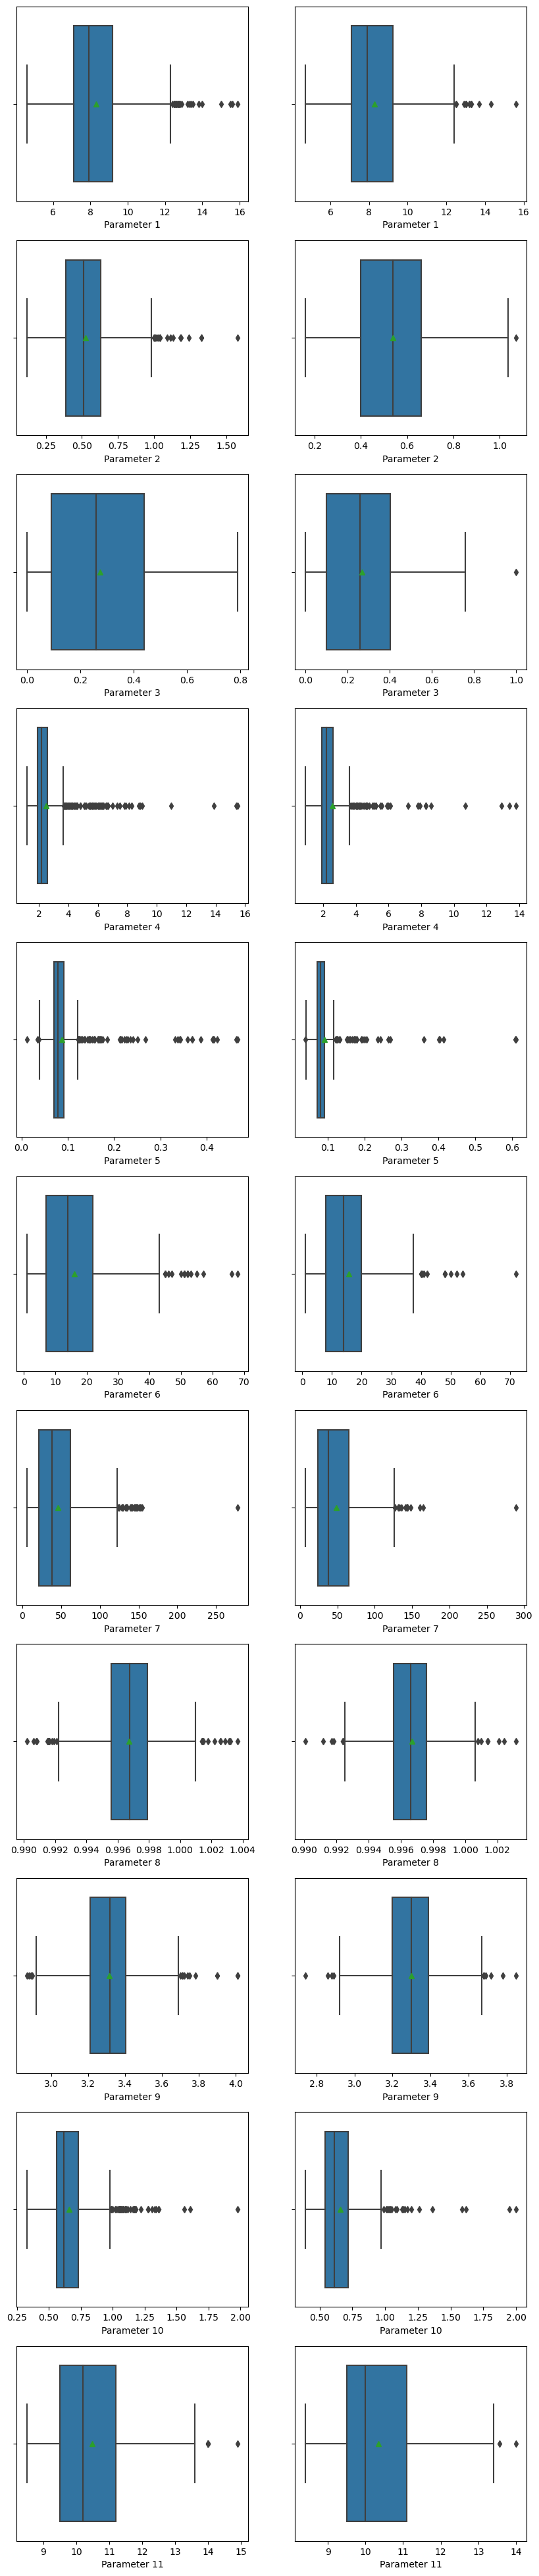

In [24]:
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(ncols=2,nrows=11,figsize=(10,50))
for i,j in enumerate(x_train.columns):    
    _=sns.boxplot(data=x_train, x=j,ax=ax[i,0],showmeans=True)
    _=sns.boxplot(data=x_test, x=j,ax=ax[i,1],showmeans=True)

**Even from boxplot we see distribution of the parameters look similar between x_train and x_test datasets**

**Checking the distribution of the output variable**

In [25]:
print("Training output variable statistics:")
y_train.describe()

# Summary statistics for test set
print("\nTest output variable statistics:")
y_test.describe()

Training output variable statistics:


count   951.00
mean      5.64
std       0.84
min       3.00
25%       5.00
50%       6.00
75%       6.00
max       8.00
Name: Signal_Strength, dtype: float64


Test output variable statistics:


count   408.00
mean      5.59
std       0.77
min       3.00
25%       5.00
50%       6.00
75%       6.00
max       8.00
Name: Signal_Strength, dtype: float64

**Even for the output variables we see the labels are distributed evenly between y_train and y_test**

**We'll scale the train and test data using Standard scaler**

In [26]:
from sklearn.preprocessing import StandardScaler

# Scaling training data
x_train_sc = StandardScaler().fit_transform(x_train)   

# Scaling testing data
x_test_sc = StandardScaler().fit_transform(x_test)    

**We'll transform y_train and y_test labels to categorical format using to_categorical function of keras**

In [27]:
from tensorflow.keras import utils

y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [28]:
y_train_cat.shape

(951, 9)

In [29]:
y_test_cat.shape

(408, 9)

**We'll experiment with a neural network having the following properties:**
- 3 hidden layers
- 32 neurons in the first, 64 in second and 32 neuron the in third hidden layer
- ReLu activation function in each layer
- HE weights initializer
- Softmax activation in the output layer for multi-class classification

In [30]:
num_classes=y_train_cat.shape[1]
num_classes

9

In [31]:
# create model
tf.keras.backend.clear_session()
model1 = Sequential()  

model1.add(Dense(32, activation='relu',kernel_initializer='he_uniform',input_shape=(x_train_sc.shape[1],))) ###Multiple Dense units with Relu activation

model1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

model1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))


model1.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [32]:
#Well use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-2)
model1.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [33]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 9)                 297       
                                                                 
Total params: 4873 (19.04 KB)
Trainable params: 4873 (19.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=50,min_lr=1e-12,model='auto')

#early_stopping = EarlyStopping(monitor='val_loss', patience=50)

callbacks = [checkpoint,reduce_lr]

**Printing the Model Architecture**

In [35]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

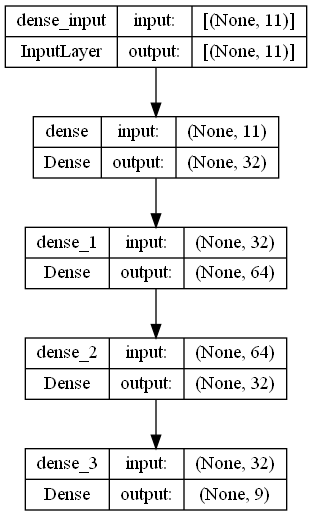

In [36]:
plot_model(model1,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=96)

In [37]:
history1=model1.fit(x_train_sc, y_train_cat, validation_split=0.2, epochs=1000, batch_size=25, verbose=2,callbacks=callbacks,workers=4,use_multiprocessing=True)

Epoch 1/1000



Epoch 1: saving model to model_weights.h5
31/31 - 2s - loss: 1.3774 - accuracy: 0.4842 - val_loss: 1.1262 - val_accuracy: 0.5340 - lr: 0.0100 - 2s/epoch - 64ms/step
Epoch 2/1000

Epoch 2: saving model to model_weights.h5
31/31 - 0s - loss: 1.0458 - accuracy: 0.5539 - val_loss: 1.0321 - val_accuracy: 0.5969 - lr: 0.0100 - 169ms/epoch - 5ms/step
Epoch 3/1000

Epoch 3: saving model to model_weights.h5
31/31 - 0s - loss: 0.9681 - accuracy: 0.5776 - val_loss: 1.0314 - val_accuracy: 0.5497 - lr: 0.0100 - 146ms/epoch - 5ms/step
Epoch 4/1000

Epoch 4: saving model to model_weights.h5
31/31 - 0s - loss: 0.9428 - accuracy: 0.5934 - val_loss: 1.0195 - val_accuracy: 0.5497 - lr: 0.0100 - 126ms/epoch - 4ms/step
Epoch 5/1000

Epoch 5: saving model to model_weights.h5
31/31 - 0s - loss: 0.9245 - accuracy: 0.5921 - val_loss: 1.0362 - val_accuracy: 0.5550 - lr: 0.0100 - 127ms/epoch - 4ms/step
Epoch 6/1000

Epoch 6: saving model to model_weights.h5
31/31 - 0s - loss: 0.8677 - accuracy: 0

31/31 - 0s - loss: 0.2346 - accuracy: 0.9039 - val_loss: 2.7655 - val_accuracy: 0.4921 - lr: 0.0100 - 174ms/epoch - 6ms/step
Epoch 44/1000

Epoch 44: saving model to model_weights.h5
31/31 - 0s - loss: 0.1865 - accuracy: 0.9211 - val_loss: 2.9022 - val_accuracy: 0.4974 - lr: 0.0100 - 161ms/epoch - 5ms/step
Epoch 45/1000

Epoch 45: saving model to model_weights.h5
31/31 - 0s - loss: 0.1975 - accuracy: 0.9224 - val_loss: 2.9629 - val_accuracy: 0.5236 - lr: 0.0100 - 110ms/epoch - 4ms/step
Epoch 46/1000

Epoch 46: saving model to model_weights.h5
31/31 - 0s - loss: 0.2402 - accuracy: 0.9211 - val_loss: 3.1663 - val_accuracy: 0.4817 - lr: 0.0100 - 127ms/epoch - 4ms/step
Epoch 47/1000

Epoch 47: saving model to model_weights.h5
31/31 - 0s - loss: 0.2841 - accuracy: 0.9092 - val_loss: 2.7336 - val_accuracy: 0.5079 - lr: 0.0100 - 136ms/epoch - 4ms/step
Epoch 48/1000

Epoch 48: saving model to model_weights.h5
31/31 - 0s - loss: 0.2362 - accuracy: 0.9171 - val_loss: 2.7833 - val_accuracy: 0.528

Epoch 88/1000

Epoch 88: saving model to model_weights.h5
31/31 - 0s - loss: 0.0294 - accuracy: 0.9921 - val_loss: 3.6469 - val_accuracy: 0.5340 - lr: 1.0000e-03 - 128ms/epoch - 4ms/step
Epoch 89/1000

Epoch 89: saving model to model_weights.h5
31/31 - 0s - loss: 0.0294 - accuracy: 0.9921 - val_loss: 3.6506 - val_accuracy: 0.5183 - lr: 1.0000e-03 - 118ms/epoch - 4ms/step
Epoch 90/1000

Epoch 90: saving model to model_weights.h5
31/31 - 0s - loss: 0.0289 - accuracy: 0.9921 - val_loss: 3.6749 - val_accuracy: 0.5236 - lr: 1.0000e-03 - 142ms/epoch - 5ms/step
Epoch 91/1000

Epoch 91: saving model to model_weights.h5
31/31 - 0s - loss: 0.0281 - accuracy: 0.9921 - val_loss: 3.6844 - val_accuracy: 0.5131 - lr: 1.0000e-03 - 123ms/epoch - 4ms/step
Epoch 92/1000

Epoch 92: saving model to model_weights.h5
31/31 - 0s - loss: 0.0282 - accuracy: 0.9921 - val_loss: 3.7081 - val_accuracy: 0.5340 - lr: 1.0000e-03 - 121ms/epoch - 4ms/step
Epoch 93/1000

Epoch 93: saving model to model_weights.h5
31/31 -

Epoch 132/1000

Epoch 132: saving model to model_weights.h5
31/31 - 0s - loss: 0.0206 - accuracy: 0.9921 - val_loss: 3.9683 - val_accuracy: 0.5288 - lr: 1.0000e-04 - 120ms/epoch - 4ms/step
Epoch 133/1000

Epoch 133: saving model to model_weights.h5
31/31 - 0s - loss: 0.0206 - accuracy: 0.9921 - val_loss: 3.9711 - val_accuracy: 0.5288 - lr: 1.0000e-04 - 143ms/epoch - 5ms/step
Epoch 134/1000

Epoch 134: saving model to model_weights.h5
31/31 - 0s - loss: 0.0206 - accuracy: 0.9921 - val_loss: 3.9723 - val_accuracy: 0.5288 - lr: 1.0000e-04 - 163ms/epoch - 5ms/step
Epoch 135/1000

Epoch 135: saving model to model_weights.h5
31/31 - 0s - loss: 0.0205 - accuracy: 0.9921 - val_loss: 3.9752 - val_accuracy: 0.5288 - lr: 1.0000e-04 - 135ms/epoch - 4ms/step
Epoch 136/1000

Epoch 136: saving model to model_weights.h5
31/31 - 0s - loss: 0.0205 - accuracy: 0.9921 - val_loss: 3.9787 - val_accuracy: 0.5288 - lr: 1.0000e-04 - 140ms/epoch - 5ms/step
Epoch 137/1000

Epoch 137: saving model to model_weight

Epoch 176/1000

Epoch 176: saving model to model_weights.h5
31/31 - 0s - loss: 0.0195 - accuracy: 0.9934 - val_loss: 4.0327 - val_accuracy: 0.5288 - lr: 1.0000e-05 - 123ms/epoch - 4ms/step
Epoch 177/1000

Epoch 177: saving model to model_weights.h5
31/31 - 0s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 4.0331 - val_accuracy: 0.5288 - lr: 1.0000e-05 - 136ms/epoch - 4ms/step
Epoch 178/1000

Epoch 178: saving model to model_weights.h5
31/31 - 0s - loss: 0.0195 - accuracy: 0.9934 - val_loss: 4.0335 - val_accuracy: 0.5288 - lr: 1.0000e-05 - 149ms/epoch - 5ms/step
Epoch 179/1000

Epoch 179: saving model to model_weights.h5
31/31 - 0s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 4.0338 - val_accuracy: 0.5288 - lr: 1.0000e-05 - 212ms/epoch - 7ms/step
Epoch 180/1000

Epoch 180: saving model to model_weights.h5
31/31 - 0s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 4.0341 - val_accuracy: 0.5288 - lr: 1.0000e-05 - 126ms/epoch - 4ms/step
Epoch 181/1000

Epoch 181: saving model to model_weight

Epoch 220/1000

Epoch 220: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0465 - val_accuracy: 0.5288 - lr: 1.0000e-06 - 130ms/epoch - 4ms/step
Epoch 221/1000

Epoch 221: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0465 - val_accuracy: 0.5288 - lr: 1.0000e-06 - 139ms/epoch - 4ms/step
Epoch 222/1000

Epoch 222: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0466 - val_accuracy: 0.5288 - lr: 1.0000e-06 - 203ms/epoch - 7ms/step
Epoch 223/1000

Epoch 223: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0466 - val_accuracy: 0.5288 - lr: 1.0000e-06 - 119ms/epoch - 4ms/step
Epoch 224/1000

Epoch 224: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0467 - val_accuracy: 0.5288 - lr: 1.0000e-06 - 126ms/epoch - 4ms/step
Epoch 225/1000

Epoch 225: saving model to model_weight

Epoch 264/1000

Epoch 264: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0487 - val_accuracy: 0.5288 - lr: 1.0000e-07 - 138ms/epoch - 4ms/step
Epoch 265/1000

Epoch 265: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0487 - val_accuracy: 0.5288 - lr: 1.0000e-07 - 119ms/epoch - 4ms/step
Epoch 266/1000

Epoch 266: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0488 - val_accuracy: 0.5288 - lr: 1.0000e-07 - 200ms/epoch - 6ms/step
Epoch 267/1000

Epoch 267: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0488 - val_accuracy: 0.5288 - lr: 1.0000e-07 - 140ms/epoch - 5ms/step
Epoch 268/1000

Epoch 268: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0488 - val_accuracy: 0.5288 - lr: 1.0000e-07 - 131ms/epoch - 4ms/step
Epoch 269/1000

Epoch 269: saving model to model_weight

Epoch 308/1000

Epoch 308: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 126ms/epoch - 4ms/step
Epoch 309/1000

Epoch 309: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 127ms/epoch - 4ms/step
Epoch 310/1000

Epoch 310: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 126ms/epoch - 4ms/step
Epoch 311/1000

Epoch 311: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 119ms/epoch - 4ms/step
Epoch 312/1000

Epoch 312: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 126ms/epoch - 4ms/step
Epoch 313/1000

Epoch 313: saving model to model_weight

Epoch 352/1000

Epoch 352: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 141ms/epoch - 5ms/step
Epoch 353/1000

Epoch 353: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 124ms/epoch - 4ms/step
Epoch 354/1000

Epoch 354: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 163ms/epoch - 5ms/step
Epoch 355/1000

Epoch 355: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 124ms/epoch - 4ms/step
Epoch 356/1000

Epoch 356: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-08 - 129ms/epoch - 4ms/step
Epoch 357/1000

Epoch 357: saving model to model_weight

Epoch 396/1000

Epoch 396: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-09 - 126ms/epoch - 4ms/step
Epoch 397/1000

Epoch 397: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-09 - 117ms/epoch - 4ms/step
Epoch 398/1000

Epoch 398: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-09 - 131ms/epoch - 4ms/step
Epoch 399/1000

Epoch 399: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-09 - 131ms/epoch - 4ms/step
Epoch 400/1000

Epoch 400: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-09 - 125ms/epoch - 4ms/step
Epoch 401/1000

Epoch 401: saving model to model_weight

Epoch 440/1000

Epoch 440: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-10 - 127ms/epoch - 4ms/step
Epoch 441/1000

Epoch 441: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-10 - 168ms/epoch - 5ms/step
Epoch 442/1000

Epoch 442: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-10 - 149ms/epoch - 5ms/step
Epoch 443/1000

Epoch 443: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-10 - 124ms/epoch - 4ms/step
Epoch 444/1000

Epoch 444: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-10 - 124ms/epoch - 4ms/step
Epoch 445/1000

Epoch 445: saving model to model_weight

Epoch 484/1000

Epoch 484: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-11 - 127ms/epoch - 4ms/step
Epoch 485/1000

Epoch 485: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-11 - 122ms/epoch - 4ms/step
Epoch 486/1000

Epoch 486: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-11 - 125ms/epoch - 4ms/step
Epoch 487/1000

Epoch 487: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-11 - 157ms/epoch - 5ms/step
Epoch 488/1000

Epoch 488: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-11 - 134ms/epoch - 4ms/step
Epoch 489/1000

Epoch 489: saving model to model_weight

Epoch 528/1000

Epoch 528: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 131ms/epoch - 4ms/step
Epoch 529/1000

Epoch 529: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 530/1000

Epoch 530: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 116ms/epoch - 4ms/step
Epoch 531/1000

Epoch 531: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 532/1000

Epoch 532: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 533/1000

Epoch 533: saving model to model_weight

Epoch 572/1000

Epoch 572: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 573/1000

Epoch 573: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 574/1000

Epoch 574: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 575/1000

Epoch 575: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 143ms/epoch - 5ms/step
Epoch 576/1000

Epoch 576: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 169ms/epoch - 5ms/step
Epoch 577/1000

Epoch 577: saving model to model_weight

Epoch 616/1000

Epoch 616: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 132ms/epoch - 4ms/step
Epoch 617/1000

Epoch 617: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 126ms/epoch - 4ms/step
Epoch 618/1000

Epoch 618: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 619/1000

Epoch 619: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 620/1000

Epoch 620: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 621/1000

Epoch 621: saving model to model_weight

Epoch 660/1000

Epoch 660: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 153ms/epoch - 5ms/step
Epoch 661/1000

Epoch 661: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 142ms/epoch - 5ms/step
Epoch 662/1000

Epoch 662: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 663/1000

Epoch 663: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 127ms/epoch - 4ms/step
Epoch 664/1000

Epoch 664: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 148ms/epoch - 5ms/step
Epoch 665/1000

Epoch 665: saving model to model_weight

Epoch 704/1000

Epoch 704: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 705/1000

Epoch 705: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 161ms/epoch - 5ms/step
Epoch 706/1000

Epoch 706: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 189ms/epoch - 6ms/step
Epoch 707/1000

Epoch 707: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 708/1000

Epoch 708: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 709/1000

Epoch 709: saving model to model_weight

Epoch 748/1000

Epoch 748: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 749/1000

Epoch 749: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 750/1000

Epoch 750: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 184ms/epoch - 6ms/step
Epoch 751/1000

Epoch 751: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 135ms/epoch - 4ms/step
Epoch 752/1000

Epoch 752: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 128ms/epoch - 4ms/step
Epoch 753/1000

Epoch 753: saving model to model_weight

Epoch 792/1000

Epoch 792: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 134ms/epoch - 4ms/step
Epoch 793/1000

Epoch 793: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 132ms/epoch - 4ms/step
Epoch 794/1000

Epoch 794: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 795/1000

Epoch 795: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 121ms/epoch - 4ms/step
Epoch 796/1000

Epoch 796: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 127ms/epoch - 4ms/step
Epoch 797/1000

Epoch 797: saving model to model_weight

Epoch 836/1000

Epoch 836: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 118ms/epoch - 4ms/step
Epoch 837/1000

Epoch 837: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 838/1000

Epoch 838: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 189ms/epoch - 6ms/step
Epoch 839/1000

Epoch 839: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 143ms/epoch - 5ms/step
Epoch 840/1000

Epoch 840: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 841/1000

Epoch 841: saving model to model_weight

Epoch 880/1000

Epoch 880: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 132ms/epoch - 4ms/step
Epoch 881/1000

Epoch 881: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 148ms/epoch - 5ms/step
Epoch 882/1000

Epoch 882: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 150ms/epoch - 5ms/step
Epoch 883/1000

Epoch 883: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 127ms/epoch - 4ms/step
Epoch 884/1000

Epoch 884: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 132ms/epoch - 4ms/step
Epoch 885/1000

Epoch 885: saving model to model_weight

Epoch 924/1000

Epoch 924: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 925/1000

Epoch 925: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 134ms/epoch - 4ms/step
Epoch 926/1000

Epoch 926: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 927/1000

Epoch 927: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 928/1000

Epoch 928: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 929/1000

Epoch 929: saving model to model_weight

Epoch 968/1000

Epoch 968: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 117ms/epoch - 4ms/step
Epoch 969/1000

Epoch 969: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 970/1000

Epoch 970: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 971/1000

Epoch 971: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 129ms/epoch - 4ms/step
Epoch 972/1000

Epoch 972: saving model to model_weights.h5
31/31 - 0s - loss: 0.0190 - accuracy: 0.9947 - val_loss: 4.0490 - val_accuracy: 0.5288 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 973/1000

Epoch 973: saving model to model_weight

### 3.C.i. Training Loss and Validation Loss

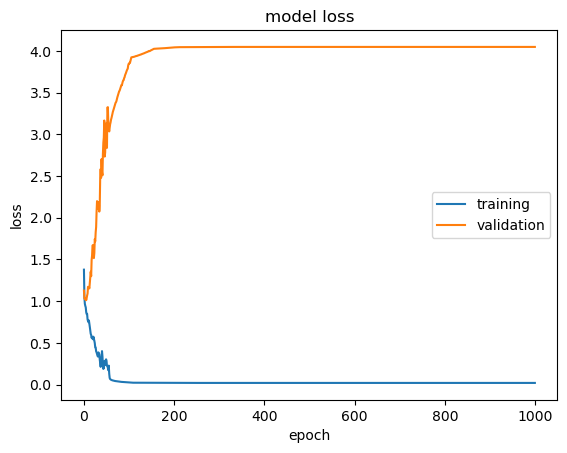

In [38]:
_=plt.plot(history1.history['loss'])
_=plt.plot(history1.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

### 3.C.ii.Training Accuracy and Validation Accuracy

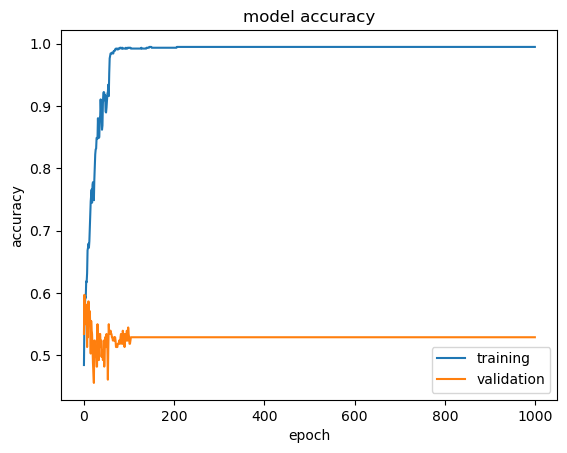

In [39]:
_=plt.plot(history1.history['accuracy'])
_=plt.plot(history1.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

In [40]:
model1.evaluate(x_test_sc,y_test_cat)

13/13 [==============================] - 0s 4ms/step - loss: 3.9928 - accuracy: 0.5466


[3.992805242538452, 0.5465686321258545]

**Observations:**
- There is an extreme difference between the Training and Validation data Loss and Accuracy
- Training Accuracy is almost 100%, while the validation accuracy is 52% and test accuracy is 54%
- Training Loss is about 0.019, while the validation loss is about 4.04
- Based on this large difference we can say that the trained model is an overfit model

**We'll Experiment with a new model having the following architecture:**
- 4 hidden layers
- 64 neurons in the first and third layer and 128 neurons in second and fourth hidden layer
- ReLu activation function in each layer
- HE weights initializer
- Softmax activation in the output layer for multi-class classification
- 50% dropout and Batch Normalization in each hidden layer

In [41]:
# create model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
tf.keras.backend.clear_session()
model2 = Sequential()  


model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform',input_shape=(x_train_sc.shape[1],))) ###Multiple Dense units with Relu activation
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())


model2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [42]:
from keras.optimizers import SGD
#Well use Adam optimizer
optimizer = optimizers.Adam(learning_rate=1e-3)
#optimizer = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(loss=losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [43]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

In [44]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=50,min_lr=1e-12,model='auto')

#early_stopping = EarlyStopping(monitor='val_loss', patience=50)

callbacks = [checkpoint,reduce_lr]

**Printing the Model Architecture**

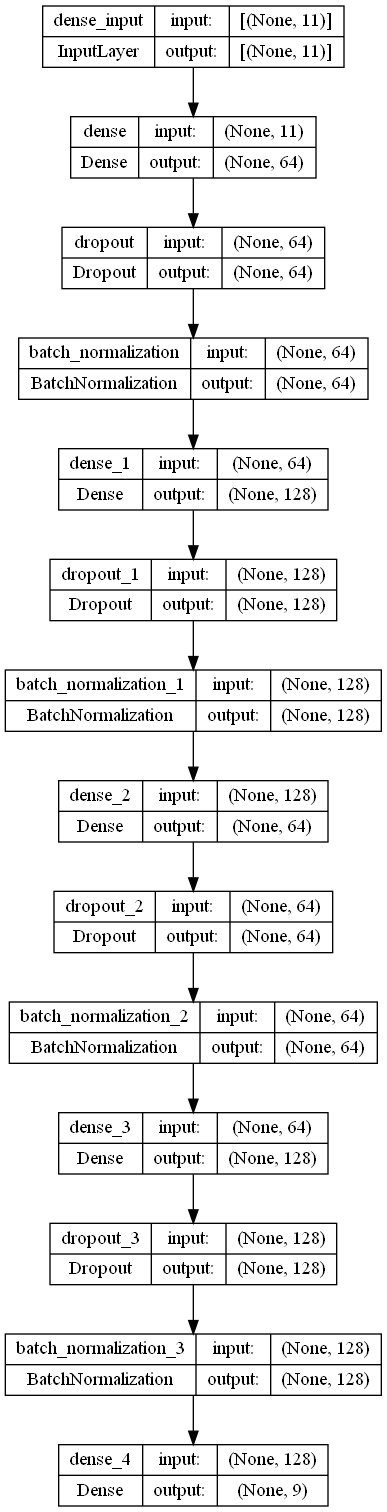

In [45]:
plot_model(model2,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=96)

In [46]:
history2=model2.fit(x_train_sc, y_train_cat, validation_split=0.2, epochs=1000, batch_size=25, verbose=2,callbacks=callbacks,workers=4,use_multiprocessing=True)

Epoch 1/1000

Epoch 1: saving model to model_weights.h5
31/31 - 5s - loss: 2.7450 - accuracy: 0.1355 - val_loss: 2.1460 - val_accuracy: 0.2618 - lr: 0.0010 - 5s/epoch - 150ms/step
Epoch 2/1000

Epoch 2: saving model to model_weights.h5
31/31 - 0s - loss: 2.3425 - accuracy: 0.2224 - val_loss: 1.8132 - val_accuracy: 0.4607 - lr: 0.0010 - 200ms/epoch - 6ms/step
Epoch 3/1000

Epoch 3: saving model to model_weights.h5
31/31 - 0s - loss: 2.2190 - accuracy: 0.2434 - val_loss: 1.5915 - val_accuracy: 0.5236 - lr: 0.0010 - 206ms/epoch - 7ms/step
Epoch 4/1000

Epoch 4: saving model to model_weights.h5
31/31 - 0s - loss: 1.9024 - accuracy: 0.3513 - val_loss: 1.4433 - val_accuracy: 0.5183 - lr: 0.0010 - 196ms/epoch - 6ms/step
Epoch 5/1000

Epoch 5: saving model to model_weights.h5
31/31 - 0s - loss: 1.7675 - accuracy: 0.3987 - val_loss: 1.3415 - val_accuracy: 0.5393 - lr: 0.0010 - 264ms/epoch - 9ms/step
Epoch 6/1000

Epoch 6: saving model to model_weights.h5
31/31 - 0s - loss: 1.7171 - accuracy: 0.

Epoch 46/1000

Epoch 46: saving model to model_weights.h5
31/31 - 0s - loss: 1.0946 - accuracy: 0.5329 - val_loss: 1.0353 - val_accuracy: 0.5707 - lr: 0.0010 - 248ms/epoch - 8ms/step
Epoch 47/1000

Epoch 47: saving model to model_weights.h5
31/31 - 0s - loss: 1.0839 - accuracy: 0.5579 - val_loss: 1.0374 - val_accuracy: 0.5550 - lr: 0.0010 - 260ms/epoch - 8ms/step
Epoch 48/1000

Epoch 48: saving model to model_weights.h5
31/31 - 0s - loss: 1.1059 - accuracy: 0.5421 - val_loss: 1.0353 - val_accuracy: 0.5654 - lr: 0.0010 - 234ms/epoch - 8ms/step
Epoch 49/1000

Epoch 49: saving model to model_weights.h5
31/31 - 0s - loss: 1.0894 - accuracy: 0.5724 - val_loss: 1.0322 - val_accuracy: 0.5759 - lr: 0.0010 - 214ms/epoch - 7ms/step
Epoch 50/1000

Epoch 50: saving model to model_weights.h5
31/31 - 0s - loss: 1.0913 - accuracy: 0.5382 - val_loss: 1.0321 - val_accuracy: 0.5707 - lr: 0.0010 - 201ms/epoch - 6ms/step
Epoch 51/1000

Epoch 51: saving model to model_weights.h5
31/31 - 0s - loss: 1.0814 -

Epoch 91/1000

Epoch 91: saving model to model_weights.h5
31/31 - 0s - loss: 1.0650 - accuracy: 0.5500 - val_loss: 1.0339 - val_accuracy: 0.5759 - lr: 0.0010 - 211ms/epoch - 7ms/step
Epoch 92/1000

Epoch 92: saving model to model_weights.h5
31/31 - 0s - loss: 1.0524 - accuracy: 0.5632 - val_loss: 1.0329 - val_accuracy: 0.5445 - lr: 0.0010 - 214ms/epoch - 7ms/step
Epoch 93/1000

Epoch 93: saving model to model_weights.h5
31/31 - 0s - loss: 1.0362 - accuracy: 0.5789 - val_loss: 1.0335 - val_accuracy: 0.5445 - lr: 0.0010 - 242ms/epoch - 8ms/step
Epoch 94/1000

Epoch 94: saving model to model_weights.h5
31/31 - 0s - loss: 1.0613 - accuracy: 0.5671 - val_loss: 1.0334 - val_accuracy: 0.5393 - lr: 0.0010 - 262ms/epoch - 8ms/step
Epoch 95/1000

Epoch 95: saving model to model_weights.h5
31/31 - 0s - loss: 1.0397 - accuracy: 0.5737 - val_loss: 1.0309 - val_accuracy: 0.5340 - lr: 0.0010 - 248ms/epoch - 8ms/step
Epoch 96/1000

Epoch 96: saving model to model_weights.h5
31/31 - 0s - loss: 1.0170 -

Epoch 136/1000

Epoch 136: saving model to model_weights.h5
31/31 - 0s - loss: 1.0141 - accuracy: 0.5671 - val_loss: 1.0304 - val_accuracy: 0.5550 - lr: 0.0010 - 349ms/epoch - 11ms/step
Epoch 137/1000

Epoch 137: saving model to model_weights.h5
31/31 - 0s - loss: 1.0099 - accuracy: 0.5632 - val_loss: 1.0316 - val_accuracy: 0.5654 - lr: 0.0010 - 222ms/epoch - 7ms/step
Epoch 138/1000

Epoch 138: saving model to model_weights.h5
31/31 - 0s - loss: 1.0074 - accuracy: 0.5684 - val_loss: 1.0334 - val_accuracy: 0.5707 - lr: 0.0010 - 199ms/epoch - 6ms/step
Epoch 139/1000

Epoch 139: saving model to model_weights.h5
31/31 - 0s - loss: 1.0145 - accuracy: 0.5697 - val_loss: 1.0389 - val_accuracy: 0.5497 - lr: 0.0010 - 206ms/epoch - 7ms/step
Epoch 140/1000

Epoch 140: saving model to model_weights.h5
31/31 - 0s - loss: 0.9914 - accuracy: 0.5737 - val_loss: 1.0331 - val_accuracy: 0.5654 - lr: 0.0010 - 196ms/epoch - 6ms/step
Epoch 141/1000

Epoch 141: saving model to model_weights.h5
31/31 - 0s - l

Epoch 180/1000

Epoch 180: saving model to model_weights.h5
31/31 - 0s - loss: 1.0151 - accuracy: 0.5513 - val_loss: 1.0425 - val_accuracy: 0.5759 - lr: 1.0000e-04 - 233ms/epoch - 8ms/step
Epoch 181/1000

Epoch 181: saving model to model_weights.h5
31/31 - 0s - loss: 0.9812 - accuracy: 0.5658 - val_loss: 1.0432 - val_accuracy: 0.5759 - lr: 1.0000e-04 - 186ms/epoch - 6ms/step
Epoch 182/1000

Epoch 182: saving model to model_weights.h5
31/31 - 0s - loss: 1.0005 - accuracy: 0.5697 - val_loss: 1.0411 - val_accuracy: 0.5707 - lr: 1.0000e-04 - 205ms/epoch - 7ms/step
Epoch 183/1000

Epoch 183: saving model to model_weights.h5
31/31 - 0s - loss: 1.0243 - accuracy: 0.5737 - val_loss: 1.0416 - val_accuracy: 0.5759 - lr: 1.0000e-04 - 248ms/epoch - 8ms/step
Epoch 184/1000

Epoch 184: saving model to model_weights.h5
31/31 - 0s - loss: 1.0060 - accuracy: 0.5408 - val_loss: 1.0428 - val_accuracy: 0.5759 - lr: 1.0000e-04 - 196ms/epoch - 6ms/step
Epoch 185/1000

Epoch 185: saving model to model_weight

Epoch 224/1000

Epoch 224: saving model to model_weights.h5
31/31 - 0s - loss: 1.0188 - accuracy: 0.5632 - val_loss: 1.0433 - val_accuracy: 0.5707 - lr: 1.0000e-05 - 296ms/epoch - 10ms/step
Epoch 225/1000

Epoch 225: saving model to model_weights.h5
31/31 - 0s - loss: 1.0153 - accuracy: 0.5737 - val_loss: 1.0438 - val_accuracy: 0.5707 - lr: 1.0000e-05 - 237ms/epoch - 8ms/step
Epoch 226/1000

Epoch 226: saving model to model_weights.h5
31/31 - 0s - loss: 0.9954 - accuracy: 0.5618 - val_loss: 1.0443 - val_accuracy: 0.5707 - lr: 1.0000e-05 - 258ms/epoch - 8ms/step
Epoch 227/1000

Epoch 227: saving model to model_weights.h5
31/31 - 0s - loss: 0.9992 - accuracy: 0.5684 - val_loss: 1.0448 - val_accuracy: 0.5707 - lr: 1.0000e-05 - 290ms/epoch - 9ms/step
Epoch 228/1000

Epoch 228: saving model to model_weights.h5
31/31 - 0s - loss: 0.9956 - accuracy: 0.5592 - val_loss: 1.0457 - val_accuracy: 0.5759 - lr: 1.0000e-05 - 205ms/epoch - 7ms/step
Epoch 229/1000

Epoch 229: saving model to model_weigh

Epoch 268/1000

Epoch 268: saving model to model_weights.h5
31/31 - 0s - loss: 1.0035 - accuracy: 0.5737 - val_loss: 1.0442 - val_accuracy: 0.5707 - lr: 1.0000e-06 - 225ms/epoch - 7ms/step
Epoch 269/1000

Epoch 269: saving model to model_weights.h5
31/31 - 0s - loss: 0.9976 - accuracy: 0.5500 - val_loss: 1.0444 - val_accuracy: 0.5707 - lr: 1.0000e-06 - 279ms/epoch - 9ms/step
Epoch 270/1000

Epoch 270: saving model to model_weights.h5
31/31 - 0s - loss: 0.9971 - accuracy: 0.5697 - val_loss: 1.0440 - val_accuracy: 0.5707 - lr: 1.0000e-06 - 208ms/epoch - 7ms/step
Epoch 271/1000

Epoch 271: saving model to model_weights.h5
31/31 - 0s - loss: 0.9916 - accuracy: 0.5842 - val_loss: 1.0448 - val_accuracy: 0.5707 - lr: 1.0000e-06 - 240ms/epoch - 8ms/step
Epoch 272/1000

Epoch 272: saving model to model_weights.h5
31/31 - 0s - loss: 0.9890 - accuracy: 0.5592 - val_loss: 1.0441 - val_accuracy: 0.5707 - lr: 1.0000e-06 - 196ms/epoch - 6ms/step
Epoch 273/1000

Epoch 273: saving model to model_weight

Epoch 312/1000

Epoch 312: saving model to model_weights.h5
31/31 - 0s - loss: 0.9942 - accuracy: 0.5763 - val_loss: 1.0430 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 212ms/epoch - 7ms/step
Epoch 313/1000

Epoch 313: saving model to model_weights.h5
31/31 - 0s - loss: 1.0191 - accuracy: 0.5816 - val_loss: 1.0436 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 201ms/epoch - 6ms/step
Epoch 314/1000

Epoch 314: saving model to model_weights.h5
31/31 - 0s - loss: 0.9991 - accuracy: 0.5763 - val_loss: 1.0441 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 207ms/epoch - 7ms/step
Epoch 315/1000

Epoch 315: saving model to model_weights.h5
31/31 - 0s - loss: 0.9906 - accuracy: 0.5882 - val_loss: 1.0439 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 301ms/epoch - 10ms/step
Epoch 316/1000

Epoch 316: saving model to model_weights.h5
31/31 - 0s - loss: 0.9939 - accuracy: 0.5566 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 197ms/epoch - 6ms/step
Epoch 317/1000

Epoch 317: saving model to model_weigh

Epoch 356/1000

Epoch 356: saving model to model_weights.h5
31/31 - 0s - loss: 0.9991 - accuracy: 0.5803 - val_loss: 1.0429 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 210ms/epoch - 7ms/step
Epoch 357/1000

Epoch 357: saving model to model_weights.h5
31/31 - 0s - loss: 1.0159 - accuracy: 0.5632 - val_loss: 1.0430 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 232ms/epoch - 7ms/step
Epoch 358/1000

Epoch 358: saving model to model_weights.h5
31/31 - 0s - loss: 1.0155 - accuracy: 0.5658 - val_loss: 1.0436 - val_accuracy: 0.5707 - lr: 1.0000e-07 - 248ms/epoch - 8ms/step
Epoch 359/1000

Epoch 359: saving model to model_weights.h5
31/31 - 0s - loss: 0.9944 - accuracy: 0.5539 - val_loss: 1.0437 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 247ms/epoch - 8ms/step
Epoch 360/1000

Epoch 360: saving model to model_weights.h5
31/31 - 0s - loss: 0.9854 - accuracy: 0.5763 - val_loss: 1.0443 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 282ms/epoch - 9ms/step
Epoch 361/1000

Epoch 361: saving model to model_weight

Epoch 400/1000

Epoch 400: saving model to model_weights.h5
31/31 - 0s - loss: 0.9939 - accuracy: 0.5737 - val_loss: 1.0433 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 220ms/epoch - 7ms/step
Epoch 401/1000

Epoch 401: saving model to model_weights.h5
31/31 - 0s - loss: 1.0178 - accuracy: 0.5697 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 250ms/epoch - 8ms/step
Epoch 402/1000

Epoch 402: saving model to model_weights.h5
31/31 - 0s - loss: 0.9887 - accuracy: 0.5750 - val_loss: 1.0437 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 214ms/epoch - 7ms/step
Epoch 403/1000

Epoch 403: saving model to model_weights.h5
31/31 - 0s - loss: 1.0001 - accuracy: 0.5645 - val_loss: 1.0442 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 230ms/epoch - 7ms/step
Epoch 404/1000

Epoch 404: saving model to model_weights.h5
31/31 - 0s - loss: 0.9886 - accuracy: 0.5539 - val_loss: 1.0436 - val_accuracy: 0.5707 - lr: 1.0000e-08 - 202ms/epoch - 7ms/step
Epoch 405/1000

Epoch 405: saving model to model_weight

Epoch 444/1000

Epoch 444: saving model to model_weights.h5
31/31 - 0s - loss: 1.0072 - accuracy: 0.5645 - val_loss: 1.0430 - val_accuracy: 0.5707 - lr: 1.0000e-09 - 211ms/epoch - 7ms/step
Epoch 445/1000

Epoch 445: saving model to model_weights.h5
31/31 - 0s - loss: 0.9882 - accuracy: 0.5697 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-09 - 211ms/epoch - 7ms/step
Epoch 446/1000

Epoch 446: saving model to model_weights.h5
31/31 - 0s - loss: 1.0048 - accuracy: 0.5750 - val_loss: 1.0420 - val_accuracy: 0.5707 - lr: 1.0000e-09 - 194ms/epoch - 6ms/step
Epoch 447/1000

Epoch 447: saving model to model_weights.h5
31/31 - 0s - loss: 1.0173 - accuracy: 0.5711 - val_loss: 1.0407 - val_accuracy: 0.5759 - lr: 1.0000e-09 - 215ms/epoch - 7ms/step
Epoch 448/1000

Epoch 448: saving model to model_weights.h5
31/31 - 0s - loss: 0.9909 - accuracy: 0.5737 - val_loss: 1.0411 - val_accuracy: 0.5759 - lr: 1.0000e-09 - 303ms/epoch - 10ms/step
Epoch 449/1000

Epoch 449: saving model to model_weigh

Epoch 488/1000

Epoch 488: saving model to model_weights.h5
31/31 - 0s - loss: 0.9952 - accuracy: 0.5632 - val_loss: 1.0439 - val_accuracy: 0.5707 - lr: 1.0000e-10 - 342ms/epoch - 11ms/step
Epoch 489/1000

Epoch 489: saving model to model_weights.h5
31/31 - 0s - loss: 1.0113 - accuracy: 0.5684 - val_loss: 1.0430 - val_accuracy: 0.5707 - lr: 1.0000e-10 - 199ms/epoch - 6ms/step
Epoch 490/1000

Epoch 490: saving model to model_weights.h5
31/31 - 0s - loss: 1.0322 - accuracy: 0.5658 - val_loss: 1.0431 - val_accuracy: 0.5707 - lr: 1.0000e-10 - 334ms/epoch - 11ms/step
Epoch 491/1000

Epoch 491: saving model to model_weights.h5
31/31 - 0s - loss: 1.0021 - accuracy: 0.5697 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-10 - 217ms/epoch - 7ms/step
Epoch 492/1000

Epoch 492: saving model to model_weights.h5
31/31 - 0s - loss: 0.9764 - accuracy: 0.6000 - val_loss: 1.0434 - val_accuracy: 0.5707 - lr: 1.0000e-10 - 296ms/epoch - 10ms/step
Epoch 493/1000

Epoch 493: saving model to model_wei

31/31 - 0s - loss: 1.0011 - accuracy: 0.5829 - val_loss: 1.0439 - val_accuracy: 0.5707 - lr: 1.0000e-11 - 219ms/epoch - 7ms/step
Epoch 532/1000

Epoch 532: saving model to model_weights.h5
31/31 - 0s - loss: 1.0028 - accuracy: 0.5658 - val_loss: 1.0431 - val_accuracy: 0.5707 - lr: 1.0000e-11 - 348ms/epoch - 11ms/step
Epoch 533/1000

Epoch 533: saving model to model_weights.h5
31/31 - 0s - loss: 0.9970 - accuracy: 0.5684 - val_loss: 1.0432 - val_accuracy: 0.5707 - lr: 1.0000e-11 - 215ms/epoch - 7ms/step
Epoch 534/1000

Epoch 534: saving model to model_weights.h5
31/31 - 0s - loss: 1.0096 - accuracy: 0.5789 - val_loss: 1.0428 - val_accuracy: 0.5759 - lr: 1.0000e-11 - 257ms/epoch - 8ms/step
Epoch 535/1000

Epoch 535: saving model to model_weights.h5
31/31 - 0s - loss: 0.9910 - accuracy: 0.5763 - val_loss: 1.0433 - val_accuracy: 0.5707 - lr: 1.0000e-11 - 201ms/epoch - 6ms/step
Epoch 536/1000

Epoch 536: saving model to model_weights.h5
31/31 - 0s - loss: 1.0149 - accuracy: 0.5355 - val_los

Epoch 575/1000

Epoch 575: saving model to model_weights.h5
31/31 - 0s - loss: 1.0175 - accuracy: 0.5553 - val_loss: 1.0429 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 220ms/epoch - 7ms/step
Epoch 576/1000

Epoch 576: saving model to model_weights.h5
31/31 - 0s - loss: 1.0117 - accuracy: 0.5724 - val_loss: 1.0428 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 246ms/epoch - 8ms/step
Epoch 577/1000

Epoch 577: saving model to model_weights.h5
31/31 - 0s - loss: 0.9951 - accuracy: 0.5855 - val_loss: 1.0427 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 347ms/epoch - 11ms/step
Epoch 578/1000

Epoch 578: saving model to model_weights.h5
31/31 - 0s - loss: 0.9996 - accuracy: 0.5671 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 244ms/epoch - 8ms/step
Epoch 579/1000

Epoch 579: saving model to model_weights.h5
31/31 - 0s - loss: 0.9997 - accuracy: 0.5803 - val_loss: 1.0439 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 200ms/epoch - 6ms/step
Epoch 580/1000

Epoch 580: saving model to model_weigh

Epoch 619/1000

Epoch 619: saving model to model_weights.h5
31/31 - 0s - loss: 0.9919 - accuracy: 0.5684 - val_loss: 1.0426 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 194ms/epoch - 6ms/step
Epoch 620/1000

Epoch 620: saving model to model_weights.h5
31/31 - 0s - loss: 1.0187 - accuracy: 0.5526 - val_loss: 1.0434 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 235ms/epoch - 8ms/step
Epoch 621/1000

Epoch 621: saving model to model_weights.h5
31/31 - 0s - loss: 1.0152 - accuracy: 0.5579 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 208ms/epoch - 7ms/step
Epoch 622/1000

Epoch 622: saving model to model_weights.h5
31/31 - 0s - loss: 1.0113 - accuracy: 0.5592 - val_loss: 1.0425 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 207ms/epoch - 7ms/step
Epoch 623/1000

Epoch 623: saving model to model_weights.h5
31/31 - 0s - loss: 0.9865 - accuracy: 0.5842 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 332ms/epoch - 11ms/step
Epoch 624/1000

Epoch 624: saving model to model_weigh

Epoch 663/1000

Epoch 663: saving model to model_weights.h5
31/31 - 0s - loss: 1.0062 - accuracy: 0.5500 - val_loss: 1.0437 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 210ms/epoch - 7ms/step
Epoch 664/1000

Epoch 664: saving model to model_weights.h5
31/31 - 0s - loss: 0.9941 - accuracy: 0.5658 - val_loss: 1.0440 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 279ms/epoch - 9ms/step
Epoch 665/1000

Epoch 665: saving model to model_weights.h5
31/31 - 0s - loss: 1.0141 - accuracy: 0.5592 - val_loss: 1.0434 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 224ms/epoch - 7ms/step
Epoch 666/1000

Epoch 666: saving model to model_weights.h5
31/31 - 0s - loss: 0.9995 - accuracy: 0.5671 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 290ms/epoch - 9ms/step
Epoch 667/1000

Epoch 667: saving model to model_weights.h5
31/31 - 0s - loss: 1.0105 - accuracy: 0.5487 - val_loss: 1.0440 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 205ms/epoch - 7ms/step
Epoch 668/1000

Epoch 668: saving model to model_weight

Epoch 707/1000

Epoch 707: saving model to model_weights.h5
31/31 - 0s - loss: 1.0060 - accuracy: 0.5526 - val_loss: 1.0442 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 272ms/epoch - 9ms/step
Epoch 708/1000

Epoch 708: saving model to model_weights.h5
31/31 - 0s - loss: 1.0080 - accuracy: 0.5750 - val_loss: 1.0440 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 223ms/epoch - 7ms/step
Epoch 709/1000

Epoch 709: saving model to model_weights.h5
31/31 - 0s - loss: 0.9976 - accuracy: 0.5868 - val_loss: 1.0429 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 210ms/epoch - 7ms/step
Epoch 710/1000

Epoch 710: saving model to model_weights.h5
31/31 - 0s - loss: 0.9854 - accuracy: 0.5776 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 209ms/epoch - 7ms/step
Epoch 711/1000

Epoch 711: saving model to model_weights.h5
31/31 - 0s - loss: 1.0155 - accuracy: 0.5447 - val_loss: 1.0433 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 197ms/epoch - 6ms/step
Epoch 712/1000

Epoch 712: saving model to model_weight

Epoch 751/1000

Epoch 751: saving model to model_weights.h5
31/31 - 0s - loss: 1.0020 - accuracy: 0.5539 - val_loss: 1.0438 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 208ms/epoch - 7ms/step
Epoch 752/1000

Epoch 752: saving model to model_weights.h5
31/31 - 0s - loss: 1.0058 - accuracy: 0.5618 - val_loss: 1.0438 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 296ms/epoch - 10ms/step
Epoch 753/1000

Epoch 753: saving model to model_weights.h5
31/31 - 0s - loss: 0.9927 - accuracy: 0.5842 - val_loss: 1.0449 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 206ms/epoch - 7ms/step
Epoch 754/1000

Epoch 754: saving model to model_weights.h5
31/31 - 0s - loss: 1.0158 - accuracy: 0.5487 - val_loss: 1.0440 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 259ms/epoch - 8ms/step
Epoch 755/1000

Epoch 755: saving model to model_weights.h5
31/31 - 0s - loss: 1.0004 - accuracy: 0.5816 - val_loss: 1.0441 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 196ms/epoch - 6ms/step
Epoch 756/1000

Epoch 756: saving model to model_weigh

Epoch 795/1000

Epoch 795: saving model to model_weights.h5
31/31 - 0s - loss: 0.9914 - accuracy: 0.5724 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 252ms/epoch - 8ms/step
Epoch 796/1000

Epoch 796: saving model to model_weights.h5
31/31 - 0s - loss: 0.9978 - accuracy: 0.5763 - val_loss: 1.0424 - val_accuracy: 0.5759 - lr: 1.0000e-12 - 232ms/epoch - 7ms/step
Epoch 797/1000

Epoch 797: saving model to model_weights.h5
31/31 - 0s - loss: 0.9773 - accuracy: 0.5632 - val_loss: 1.0436 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 223ms/epoch - 7ms/step
Epoch 798/1000

Epoch 798: saving model to model_weights.h5
31/31 - 0s - loss: 0.9832 - accuracy: 0.5776 - val_loss: 1.0436 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 203ms/epoch - 7ms/step
Epoch 799/1000

Epoch 799: saving model to model_weights.h5
31/31 - 0s - loss: 1.0081 - accuracy: 0.5592 - val_loss: 1.0437 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 315ms/epoch - 10ms/step
Epoch 800/1000

Epoch 800: saving model to model_weigh

Epoch 839/1000

Epoch 839: saving model to model_weights.h5
31/31 - 0s - loss: 0.9900 - accuracy: 0.5763 - val_loss: 1.0432 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 295ms/epoch - 10ms/step
Epoch 840/1000

Epoch 840: saving model to model_weights.h5
31/31 - 0s - loss: 0.9876 - accuracy: 0.5842 - val_loss: 1.0439 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 240ms/epoch - 8ms/step
Epoch 841/1000

Epoch 841: saving model to model_weights.h5
31/31 - 0s - loss: 1.0070 - accuracy: 0.5579 - val_loss: 1.0435 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 256ms/epoch - 8ms/step
Epoch 842/1000

Epoch 842: saving model to model_weights.h5
31/31 - 0s - loss: 0.9884 - accuracy: 0.5434 - val_loss: 1.0434 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 218ms/epoch - 7ms/step
Epoch 843/1000

Epoch 843: saving model to model_weights.h5
31/31 - 0s - loss: 1.0016 - accuracy: 0.5789 - val_loss: 1.0447 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 281ms/epoch - 9ms/step
Epoch 844/1000

Epoch 844: saving model to model_weigh

Epoch 883/1000

Epoch 883: saving model to model_weights.h5
31/31 - 0s - loss: 1.0052 - accuracy: 0.5553 - val_loss: 1.0428 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 312ms/epoch - 10ms/step
Epoch 884/1000

Epoch 884: saving model to model_weights.h5
31/31 - 0s - loss: 0.9983 - accuracy: 0.5921 - val_loss: 1.0424 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 203ms/epoch - 7ms/step
Epoch 885/1000

Epoch 885: saving model to model_weights.h5
31/31 - 0s - loss: 0.9979 - accuracy: 0.5776 - val_loss: 1.0427 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 259ms/epoch - 8ms/step
Epoch 886/1000

Epoch 886: saving model to model_weights.h5
31/31 - 0s - loss: 1.0134 - accuracy: 0.5724 - val_loss: 1.0434 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 298ms/epoch - 10ms/step
Epoch 887/1000

Epoch 887: saving model to model_weights.h5
31/31 - 0s - loss: 1.0249 - accuracy: 0.5724 - val_loss: 1.0431 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 264ms/epoch - 9ms/step
Epoch 888/1000

Epoch 888: saving model to model_weig

31/31 - 0s - loss: 1.0168 - accuracy: 0.5684 - val_loss: 1.0445 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 210ms/epoch - 7ms/step
Epoch 927/1000

Epoch 927: saving model to model_weights.h5
31/31 - 0s - loss: 1.0083 - accuracy: 0.5658 - val_loss: 1.0431 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 212ms/epoch - 7ms/step
Epoch 928/1000

Epoch 928: saving model to model_weights.h5
31/31 - 0s - loss: 1.0042 - accuracy: 0.5789 - val_loss: 1.0431 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 221ms/epoch - 7ms/step
Epoch 929/1000

Epoch 929: saving model to model_weights.h5
31/31 - 0s - loss: 1.0136 - accuracy: 0.5684 - val_loss: 1.0432 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 264ms/epoch - 9ms/step
Epoch 930/1000

Epoch 930: saving model to model_weights.h5
31/31 - 0s - loss: 0.9947 - accuracy: 0.5697 - val_loss: 1.0433 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 266ms/epoch - 9ms/step
Epoch 931/1000

Epoch 931: saving model to model_weights.h5
31/31 - 0s - loss: 1.0110 - accuracy: 0.5855 - val_loss

Epoch 970/1000

Epoch 970: saving model to model_weights.h5
31/31 - 0s - loss: 0.9921 - accuracy: 0.5724 - val_loss: 1.0423 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 206ms/epoch - 7ms/step
Epoch 971/1000

Epoch 971: saving model to model_weights.h5
31/31 - 0s - loss: 1.0226 - accuracy: 0.5553 - val_loss: 1.0423 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 252ms/epoch - 8ms/step
Epoch 972/1000

Epoch 972: saving model to model_weights.h5
31/31 - 0s - loss: 1.0147 - accuracy: 0.5645 - val_loss: 1.0428 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 216ms/epoch - 7ms/step
Epoch 973/1000

Epoch 973: saving model to model_weights.h5
31/31 - 0s - loss: 1.0065 - accuracy: 0.5697 - val_loss: 1.0427 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 262ms/epoch - 8ms/step
Epoch 974/1000

Epoch 974: saving model to model_weights.h5
31/31 - 0s - loss: 0.9886 - accuracy: 0.5737 - val_loss: 1.0426 - val_accuracy: 0.5707 - lr: 1.0000e-12 - 189ms/epoch - 6ms/step
Epoch 975/1000

Epoch 975: saving model to model_weight

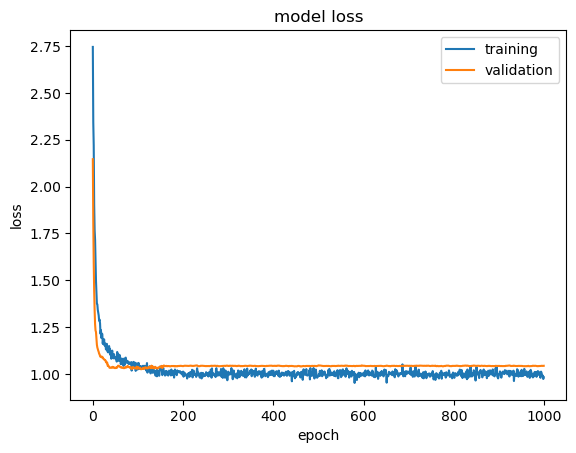

In [47]:
_=plt.plot(history2.history['loss'])
_=plt.plot(history2.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

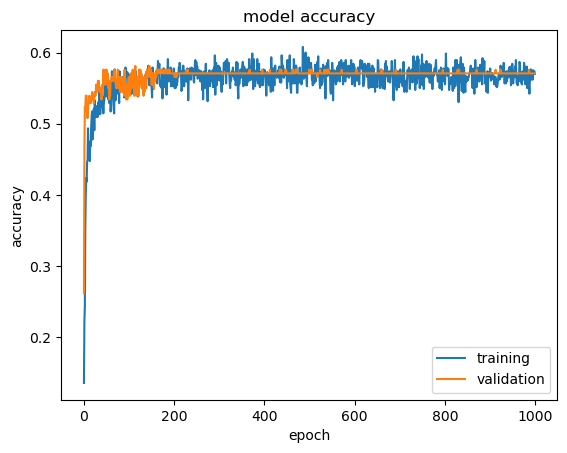

In [48]:
_=plt.plot(history2.history['accuracy'])
_=plt.plot(history2.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

In [49]:
model2.evaluate(x_test_sc,y_test_cat)

13/13 [==============================] - 0s 2ms/step - loss: 0.9026 - accuracy: 0.6103


[0.9026063084602356, 0.6102941036224365]

**Model2's performance looks to be good as it is not overfit, but we'll experiment with one more model**

**Lets Experiment with a simpler model with one hidden layer. In this model we'll use:**
- One hidden layer
- 128 neuron in the hidden layer
- L1 regularization
- ReLu activation function
- HE weights initializer
- 50% dropout
- Batch Normalization at the hidden layer output

In [50]:
# create model
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras import regularizers
tf.keras.backend.clear_session()
model3 = Sequential()  


model3.add(Dense(128, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=regularizers.l1(0.01),input_shape=(x_train_sc.shape[1],))) ###Multiple Dense units with Relu activation
model3.add(Dropout(0.5))
model3.add(BatchNormalization())

model3.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [51]:
from keras.optimizers import SGD
#Well use Adam optimizer
optimizer = optimizers.Adam(learning_rate=0.001)
#optimizer = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [52]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 3209 (12.54 KB)
Trainable params: 2953 (11.54 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [53]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=100,min_lr=1e-12,model='auto')

#early_stopping = EarlyStopping(monitor='val_loss', patience=50)

callbacks = [checkpoint,reduce_lr]

**Printing the Model Architecture**

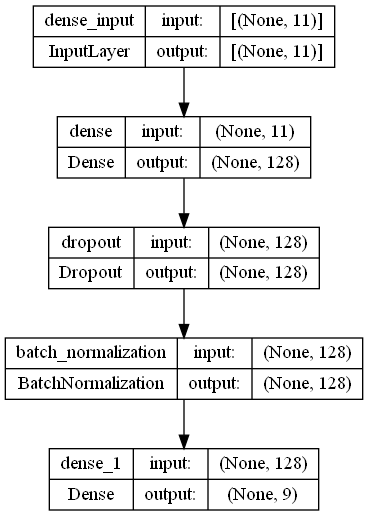

In [54]:
plot_model(model3,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=96)

In [55]:
history3=model3.fit(x_train_sc, y_train_cat, validation_split=0.2, epochs=2000, batch_size=25, callbacks=callbacks, verbose=2,workers=4,use_multiprocessing=True)

Epoch 1/2000

Epoch 1: saving model to model_weights.h5
31/31 - 2s - loss: 7.8284 - accuracy: 0.2118 - val_loss: 7.7739 - val_accuracy: 0.1571 - lr: 0.0010 - 2s/epoch - 53ms/step
Epoch 2/2000

Epoch 2: saving model to model_weights.h5
31/31 - 0s - loss: 7.2850 - accuracy: 0.2961 - val_loss: 7.0291 - val_accuracy: 0.3665 - lr: 0.0010 - 203ms/epoch - 7ms/step
Epoch 3/2000

Epoch 3: saving model to model_weights.h5
31/31 - 0s - loss: 6.7698 - accuracy: 0.3513 - val_loss: 6.4754 - val_accuracy: 0.4503 - lr: 0.0010 - 146ms/epoch - 5ms/step
Epoch 4/2000

Epoch 4: saving model to model_weights.h5
31/31 - 0s - loss: 6.3361 - accuracy: 0.4329 - val_loss: 6.0307 - val_accuracy: 0.5131 - lr: 0.0010 - 137ms/epoch - 4ms/step
Epoch 5/2000

Epoch 5: saving model to model_weights.h5
31/31 - 0s - loss: 6.0282 - accuracy: 0.4263 - val_loss: 5.6559 - val_accuracy: 0.5340 - lr: 0.0010 - 141ms/epoch - 5ms/step
Epoch 6/2000

Epoch 6: saving model to model_weights.h5
31/31 - 0s - loss: 5.6665 - accuracy: 0.4

Epoch 46/2000

Epoch 46: saving model to model_weights.h5
31/31 - 0s - loss: 1.2497 - accuracy: 0.5842 - val_loss: 1.3406 - val_accuracy: 0.5654 - lr: 0.0010 - 188ms/epoch - 6ms/step
Epoch 47/2000

Epoch 47: saving model to model_weights.h5
31/31 - 0s - loss: 1.2176 - accuracy: 0.5974 - val_loss: 1.3217 - val_accuracy: 0.5759 - lr: 0.0010 - 119ms/epoch - 4ms/step
Epoch 48/2000

Epoch 48: saving model to model_weights.h5
31/31 - 0s - loss: 1.2166 - accuracy: 0.6039 - val_loss: 1.2914 - val_accuracy: 0.5497 - lr: 0.0010 - 126ms/epoch - 4ms/step
Epoch 49/2000

Epoch 49: saving model to model_weights.h5
31/31 - 0s - loss: 1.2113 - accuracy: 0.5697 - val_loss: 1.2905 - val_accuracy: 0.5707 - lr: 0.0010 - 133ms/epoch - 4ms/step
Epoch 50/2000

Epoch 50: saving model to model_weights.h5
31/31 - 0s - loss: 1.1789 - accuracy: 0.5921 - val_loss: 1.2764 - val_accuracy: 0.5497 - lr: 0.0010 - 151ms/epoch - 5ms/step
Epoch 51/2000

Epoch 51: saving model to model_weights.h5
31/31 - 0s - loss: 1.1465 -

Epoch 91/2000

Epoch 91: saving model to model_weights.h5
31/31 - 0s - loss: 1.0264 - accuracy: 0.5855 - val_loss: 1.1582 - val_accuracy: 0.5602 - lr: 0.0010 - 183ms/epoch - 6ms/step
Epoch 92/2000

Epoch 92: saving model to model_weights.h5
31/31 - 0s - loss: 1.0145 - accuracy: 0.6079 - val_loss: 1.1531 - val_accuracy: 0.5812 - lr: 0.0010 - 156ms/epoch - 5ms/step
Epoch 93/2000

Epoch 93: saving model to model_weights.h5
31/31 - 0s - loss: 1.0215 - accuracy: 0.6118 - val_loss: 1.1257 - val_accuracy: 0.5812 - lr: 0.0010 - 205ms/epoch - 7ms/step
Epoch 94/2000

Epoch 94: saving model to model_weights.h5
31/31 - 0s - loss: 1.0276 - accuracy: 0.6000 - val_loss: 1.1274 - val_accuracy: 0.5812 - lr: 0.0010 - 146ms/epoch - 5ms/step
Epoch 95/2000

Epoch 95: saving model to model_weights.h5
31/31 - 0s - loss: 1.0435 - accuracy: 0.5671 - val_loss: 1.1342 - val_accuracy: 0.5864 - lr: 0.0010 - 133ms/epoch - 4ms/step
Epoch 96/2000

Epoch 96: saving model to model_weights.h5
31/31 - 0s - loss: 1.0444 -

Epoch 136/2000

Epoch 136: saving model to model_weights.h5
31/31 - 0s - loss: 0.9979 - accuracy: 0.5934 - val_loss: 1.1446 - val_accuracy: 0.6021 - lr: 0.0010 - 136ms/epoch - 4ms/step
Epoch 137/2000

Epoch 137: saving model to model_weights.h5
31/31 - 0s - loss: 0.9881 - accuracy: 0.6145 - val_loss: 1.1439 - val_accuracy: 0.5864 - lr: 0.0010 - 129ms/epoch - 4ms/step
Epoch 138/2000

Epoch 138: saving model to model_weights.h5
31/31 - 0s - loss: 1.0111 - accuracy: 0.6079 - val_loss: 1.1497 - val_accuracy: 0.5916 - lr: 0.0010 - 142ms/epoch - 5ms/step
Epoch 139/2000

Epoch 139: saving model to model_weights.h5
31/31 - 0s - loss: 1.0043 - accuracy: 0.5921 - val_loss: 1.1541 - val_accuracy: 0.5759 - lr: 0.0010 - 131ms/epoch - 4ms/step
Epoch 140/2000

Epoch 140: saving model to model_weights.h5
31/31 - 0s - loss: 0.9941 - accuracy: 0.6105 - val_loss: 1.1554 - val_accuracy: 0.5707 - lr: 0.0010 - 139ms/epoch - 4ms/step
Epoch 141/2000

Epoch 141: saving model to model_weights.h5
31/31 - 0s - lo

31/31 - 0s - loss: 0.9756 - accuracy: 0.6132 - val_loss: 1.1380 - val_accuracy: 0.5812 - lr: 0.0010 - 141ms/epoch - 5ms/step
Epoch 181/2000

Epoch 181: saving model to model_weights.h5
31/31 - 0s - loss: 0.9970 - accuracy: 0.6000 - val_loss: 1.1647 - val_accuracy: 0.5812 - lr: 0.0010 - 144ms/epoch - 5ms/step
Epoch 182/2000

Epoch 182: saving model to model_weights.h5
31/31 - 0s - loss: 1.0012 - accuracy: 0.6132 - val_loss: 1.1443 - val_accuracy: 0.5707 - lr: 0.0010 - 138ms/epoch - 4ms/step
Epoch 183/2000

Epoch 183: saving model to model_weights.h5
31/31 - 0s - loss: 0.9941 - accuracy: 0.5842 - val_loss: 1.1767 - val_accuracy: 0.5759 - lr: 0.0010 - 126ms/epoch - 4ms/step
Epoch 184/2000

Epoch 184: saving model to model_weights.h5
31/31 - 0s - loss: 1.0079 - accuracy: 0.6039 - val_loss: 1.1503 - val_accuracy: 0.5969 - lr: 0.0010 - 131ms/epoch - 4ms/step
Epoch 185/2000

Epoch 185: saving model to model_weights.h5
31/31 - 0s - loss: 1.0042 - accuracy: 0.6000 - val_loss: 1.1390 - val_accur

Epoch 225/2000

Epoch 225: saving model to model_weights.h5
31/31 - 0s - loss: 0.9626 - accuracy: 0.6000 - val_loss: 1.1368 - val_accuracy: 0.5969 - lr: 1.0000e-04 - 196ms/epoch - 6ms/step
Epoch 226/2000

Epoch 226: saving model to model_weights.h5
31/31 - 0s - loss: 0.9110 - accuracy: 0.6368 - val_loss: 1.1381 - val_accuracy: 0.5916 - lr: 1.0000e-04 - 122ms/epoch - 4ms/step
Epoch 227/2000

Epoch 227: saving model to model_weights.h5
31/31 - 0s - loss: 0.9260 - accuracy: 0.6132 - val_loss: 1.1379 - val_accuracy: 0.5864 - lr: 1.0000e-04 - 132ms/epoch - 4ms/step
Epoch 228/2000

Epoch 228: saving model to model_weights.h5
31/31 - 0s - loss: 0.9372 - accuracy: 0.6224 - val_loss: 1.1389 - val_accuracy: 0.6021 - lr: 1.0000e-04 - 142ms/epoch - 5ms/step
Epoch 229/2000

Epoch 229: saving model to model_weights.h5
31/31 - 0s - loss: 0.9385 - accuracy: 0.6368 - val_loss: 1.1351 - val_accuracy: 0.5969 - lr: 1.0000e-04 - 203ms/epoch - 7ms/step
Epoch 230/2000

Epoch 230: saving model to model_weight

Epoch 269/2000

Epoch 269: saving model to model_weights.h5
31/31 - 0s - loss: 0.9243 - accuracy: 0.6184 - val_loss: 1.1226 - val_accuracy: 0.5969 - lr: 1.0000e-04 - 138ms/epoch - 4ms/step
Epoch 270/2000

Epoch 270: saving model to model_weights.h5
31/31 - 0s - loss: 0.9085 - accuracy: 0.6329 - val_loss: 1.1270 - val_accuracy: 0.6073 - lr: 1.0000e-04 - 152ms/epoch - 5ms/step
Epoch 271/2000

Epoch 271: saving model to model_weights.h5
31/31 - 0s - loss: 0.9161 - accuracy: 0.6092 - val_loss: 1.1264 - val_accuracy: 0.5916 - lr: 1.0000e-04 - 141ms/epoch - 5ms/step
Epoch 272/2000

Epoch 272: saving model to model_weights.h5
31/31 - 0s - loss: 0.8979 - accuracy: 0.6342 - val_loss: 1.1263 - val_accuracy: 0.5969 - lr: 1.0000e-04 - 130ms/epoch - 4ms/step
Epoch 273/2000

Epoch 273: saving model to model_weights.h5
31/31 - 0s - loss: 0.9381 - accuracy: 0.6013 - val_loss: 1.1303 - val_accuracy: 0.6021 - lr: 1.0000e-04 - 131ms/epoch - 4ms/step
Epoch 274/2000

Epoch 274: saving model to model_weight

Epoch 313/2000

Epoch 313: saving model to model_weights.h5
31/31 - 0s - loss: 0.9090 - accuracy: 0.6421 - val_loss: 1.1316 - val_accuracy: 0.6073 - lr: 1.0000e-05 - 145ms/epoch - 5ms/step
Epoch 314/2000

Epoch 314: saving model to model_weights.h5
31/31 - 0s - loss: 0.9092 - accuracy: 0.6395 - val_loss: 1.1322 - val_accuracy: 0.6073 - lr: 1.0000e-05 - 133ms/epoch - 4ms/step
Epoch 315/2000

Epoch 315: saving model to model_weights.h5
31/31 - 0s - loss: 0.9229 - accuracy: 0.6263 - val_loss: 1.1320 - val_accuracy: 0.6021 - lr: 1.0000e-05 - 130ms/epoch - 4ms/step
Epoch 316/2000

Epoch 316: saving model to model_weights.h5
31/31 - 0s - loss: 0.9139 - accuracy: 0.6289 - val_loss: 1.1319 - val_accuracy: 0.6021 - lr: 1.0000e-05 - 129ms/epoch - 4ms/step
Epoch 317/2000

Epoch 317: saving model to model_weights.h5
31/31 - 0s - loss: 0.8832 - accuracy: 0.6434 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-05 - 147ms/epoch - 5ms/step
Epoch 318/2000

Epoch 318: saving model to model_weight

Epoch 357/2000

Epoch 357: saving model to model_weights.h5
31/31 - 0s - loss: 0.9126 - accuracy: 0.6303 - val_loss: 1.1329 - val_accuracy: 0.6073 - lr: 1.0000e-05 - 133ms/epoch - 4ms/step
Epoch 358/2000

Epoch 358: saving model to model_weights.h5
31/31 - 0s - loss: 0.9138 - accuracy: 0.6276 - val_loss: 1.1328 - val_accuracy: 0.6073 - lr: 1.0000e-05 - 138ms/epoch - 4ms/step
Epoch 359/2000

Epoch 359: saving model to model_weights.h5
31/31 - 0s - loss: 0.8990 - accuracy: 0.6184 - val_loss: 1.1327 - val_accuracy: 0.6073 - lr: 1.0000e-05 - 121ms/epoch - 4ms/step
Epoch 360/2000

Epoch 360: saving model to model_weights.h5
31/31 - 0s - loss: 0.9220 - accuracy: 0.6145 - val_loss: 1.1328 - val_accuracy: 0.6021 - lr: 1.0000e-05 - 160ms/epoch - 5ms/step
Epoch 361/2000

Epoch 361: saving model to model_weights.h5
31/31 - 0s - loss: 0.8703 - accuracy: 0.6500 - val_loss: 1.1318 - val_accuracy: 0.5969 - lr: 1.0000e-05 - 153ms/epoch - 5ms/step
Epoch 362/2000

Epoch 362: saving model to model_weight

Epoch 401/2000

Epoch 401: saving model to model_weights.h5
31/31 - 0s - loss: 0.9130 - accuracy: 0.6145 - val_loss: 1.1312 - val_accuracy: 0.5969 - lr: 1.0000e-05 - 134ms/epoch - 4ms/step
Epoch 402/2000

Epoch 402: saving model to model_weights.h5
31/31 - 0s - loss: 0.9038 - accuracy: 0.6434 - val_loss: 1.1325 - val_accuracy: 0.5969 - lr: 1.0000e-05 - 275ms/epoch - 9ms/step
Epoch 403/2000

Epoch 403: saving model to model_weights.h5
31/31 - 0s - loss: 0.8953 - accuracy: 0.6461 - val_loss: 1.1326 - val_accuracy: 0.5969 - lr: 1.0000e-05 - 132ms/epoch - 4ms/step
Epoch 404/2000

Epoch 404: saving model to model_weights.h5
31/31 - 0s - loss: 0.8774 - accuracy: 0.6408 - val_loss: 1.1312 - val_accuracy: 0.5864 - lr: 1.0000e-05 - 155ms/epoch - 5ms/step
Epoch 405/2000

Epoch 405: saving model to model_weights.h5
31/31 - 0s - loss: 0.9192 - accuracy: 0.6355 - val_loss: 1.1318 - val_accuracy: 0.5864 - lr: 1.0000e-05 - 210ms/epoch - 7ms/step
Epoch 406/2000

Epoch 406: saving model to model_weight

Epoch 445/2000

Epoch 445: saving model to model_weights.h5
31/31 - 0s - loss: 0.9170 - accuracy: 0.6316 - val_loss: 1.1306 - val_accuracy: 0.6021 - lr: 1.0000e-06 - 156ms/epoch - 5ms/step
Epoch 446/2000

Epoch 446: saving model to model_weights.h5
31/31 - 0s - loss: 0.9111 - accuracy: 0.6368 - val_loss: 1.1320 - val_accuracy: 0.5969 - lr: 1.0000e-06 - 132ms/epoch - 4ms/step
Epoch 447/2000

Epoch 447: saving model to model_weights.h5
31/31 - 0s - loss: 0.8959 - accuracy: 0.6408 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-06 - 127ms/epoch - 4ms/step
Epoch 448/2000

Epoch 448: saving model to model_weights.h5
31/31 - 0s - loss: 0.9171 - accuracy: 0.6250 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-06 - 146ms/epoch - 5ms/step
Epoch 449/2000

Epoch 449: saving model to model_weights.h5
31/31 - 0s - loss: 0.8955 - accuracy: 0.6395 - val_loss: 1.1312 - val_accuracy: 0.6021 - lr: 1.0000e-06 - 148ms/epoch - 5ms/step
Epoch 450/2000

Epoch 450: saving model to model_weight

Epoch 489/2000

Epoch 489: saving model to model_weights.h5
31/31 - 0s - loss: 0.9072 - accuracy: 0.6197 - val_loss: 1.1310 - val_accuracy: 0.5916 - lr: 1.0000e-06 - 150ms/epoch - 5ms/step
Epoch 490/2000

Epoch 490: saving model to model_weights.h5
31/31 - 0s - loss: 0.9280 - accuracy: 0.6145 - val_loss: 1.1298 - val_accuracy: 0.6073 - lr: 1.0000e-06 - 133ms/epoch - 4ms/step
Epoch 491/2000

Epoch 491: saving model to model_weights.h5
31/31 - 0s - loss: 0.8883 - accuracy: 0.6303 - val_loss: 1.1296 - val_accuracy: 0.6021 - lr: 1.0000e-06 - 249ms/epoch - 8ms/step
Epoch 492/2000

Epoch 492: saving model to model_weights.h5
31/31 - 0s - loss: 0.9175 - accuracy: 0.6158 - val_loss: 1.1302 - val_accuracy: 0.5916 - lr: 1.0000e-06 - 194ms/epoch - 6ms/step
Epoch 493/2000

Epoch 493: saving model to model_weights.h5
31/31 - 0s - loss: 0.9002 - accuracy: 0.6329 - val_loss: 1.1310 - val_accuracy: 0.5916 - lr: 1.0000e-06 - 133ms/epoch - 4ms/step
Epoch 494/2000

Epoch 494: saving model to model_weight

Epoch 533/2000

Epoch 533: saving model to model_weights.h5
31/31 - 0s - loss: 0.9317 - accuracy: 0.6132 - val_loss: 1.1303 - val_accuracy: 0.5864 - lr: 1.0000e-07 - 128ms/epoch - 4ms/step
Epoch 534/2000

Epoch 534: saving model to model_weights.h5
31/31 - 0s - loss: 0.9241 - accuracy: 0.6224 - val_loss: 1.1304 - val_accuracy: 0.5864 - lr: 1.0000e-07 - 123ms/epoch - 4ms/step
Epoch 535/2000

Epoch 535: saving model to model_weights.h5
31/31 - 0s - loss: 0.9293 - accuracy: 0.5908 - val_loss: 1.1307 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 139ms/epoch - 4ms/step
Epoch 536/2000

Epoch 536: saving model to model_weights.h5
31/31 - 0s - loss: 0.8843 - accuracy: 0.6303 - val_loss: 1.1299 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 257ms/epoch - 8ms/step
Epoch 537/2000

Epoch 537: saving model to model_weights.h5
31/31 - 0s - loss: 0.8846 - accuracy: 0.6408 - val_loss: 1.1295 - val_accuracy: 0.5969 - lr: 1.0000e-07 - 172ms/epoch - 6ms/step
Epoch 538/2000

Epoch 538: saving model to model_weight

Epoch 577/2000

Epoch 577: saving model to model_weights.h5
31/31 - 0s - loss: 0.8893 - accuracy: 0.6303 - val_loss: 1.1321 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 150ms/epoch - 5ms/step
Epoch 578/2000

Epoch 578: saving model to model_weights.h5
31/31 - 0s - loss: 0.8955 - accuracy: 0.6237 - val_loss: 1.1311 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 140ms/epoch - 5ms/step
Epoch 579/2000

Epoch 579: saving model to model_weights.h5
31/31 - 0s - loss: 0.9123 - accuracy: 0.6250 - val_loss: 1.1302 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 133ms/epoch - 4ms/step
Epoch 580/2000

Epoch 580: saving model to model_weights.h5
31/31 - 0s - loss: 0.8806 - accuracy: 0.6382 - val_loss: 1.1297 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 139ms/epoch - 4ms/step
Epoch 581/2000

Epoch 581: saving model to model_weights.h5
31/31 - 0s - loss: 0.9158 - accuracy: 0.6329 - val_loss: 1.1300 - val_accuracy: 0.5916 - lr: 1.0000e-07 - 133ms/epoch - 4ms/step
Epoch 582/2000

Epoch 582: saving model to model_weight

Epoch 621/2000

Epoch 621: saving model to model_weights.h5
31/31 - 0s - loss: 0.9052 - accuracy: 0.6408 - val_loss: 1.1308 - val_accuracy: 0.5969 - lr: 1.0000e-08 - 146ms/epoch - 5ms/step
Epoch 622/2000

Epoch 622: saving model to model_weights.h5
31/31 - 0s - loss: 0.9097 - accuracy: 0.6316 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 187ms/epoch - 6ms/step
Epoch 623/2000

Epoch 623: saving model to model_weights.h5
31/31 - 0s - loss: 0.9069 - accuracy: 0.6053 - val_loss: 1.1304 - val_accuracy: 0.5969 - lr: 1.0000e-08 - 141ms/epoch - 5ms/step
Epoch 624/2000

Epoch 624: saving model to model_weights.h5
31/31 - 0s - loss: 0.9046 - accuracy: 0.6211 - val_loss: 1.1301 - val_accuracy: 0.6021 - lr: 1.0000e-08 - 133ms/epoch - 4ms/step
Epoch 625/2000

Epoch 625: saving model to model_weights.h5
31/31 - 0s - loss: 0.9134 - accuracy: 0.6263 - val_loss: 1.1304 - val_accuracy: 0.6021 - lr: 1.0000e-08 - 159ms/epoch - 5ms/step
Epoch 626/2000

Epoch 626: saving model to model_weight

Epoch 665/2000

Epoch 665: saving model to model_weights.h5
31/31 - 0s - loss: 0.9148 - accuracy: 0.6013 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 162ms/epoch - 5ms/step
Epoch 666/2000

Epoch 666: saving model to model_weights.h5
31/31 - 0s - loss: 0.9113 - accuracy: 0.6197 - val_loss: 1.1305 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 140ms/epoch - 5ms/step
Epoch 667/2000

Epoch 667: saving model to model_weights.h5
31/31 - 0s - loss: 0.9160 - accuracy: 0.6145 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 155ms/epoch - 5ms/step
Epoch 668/2000

Epoch 668: saving model to model_weights.h5
31/31 - 0s - loss: 0.9113 - accuracy: 0.6276 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 158ms/epoch - 5ms/step
Epoch 669/2000

Epoch 669: saving model to model_weights.h5
31/31 - 0s - loss: 0.9214 - accuracy: 0.6013 - val_loss: 1.1290 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 137ms/epoch - 4ms/step
Epoch 670/2000

Epoch 670: saving model to model_weight

Epoch 709/2000

Epoch 709: saving model to model_weights.h5
31/31 - 0s - loss: 0.8993 - accuracy: 0.6487 - val_loss: 1.1305 - val_accuracy: 0.5969 - lr: 1.0000e-08 - 104ms/epoch - 3ms/step
Epoch 710/2000

Epoch 710: saving model to model_weights.h5
31/31 - 0s - loss: 0.9185 - accuracy: 0.6118 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-08 - 131ms/epoch - 4ms/step
Epoch 711/2000

Epoch 711: saving model to model_weights.h5
31/31 - 0s - loss: 0.8864 - accuracy: 0.6395 - val_loss: 1.1314 - val_accuracy: 0.5969 - lr: 1.0000e-08 - 116ms/epoch - 4ms/step
Epoch 712/2000

Epoch 712: saving model to model_weights.h5
31/31 - 0s - loss: 0.9047 - accuracy: 0.6447 - val_loss: 1.1322 - val_accuracy: 0.5812 - lr: 1.0000e-09 - 107ms/epoch - 3ms/step
Epoch 713/2000

Epoch 713: saving model to model_weights.h5
31/31 - 0s - loss: 0.9125 - accuracy: 0.6250 - val_loss: 1.1327 - val_accuracy: 0.5812 - lr: 1.0000e-09 - 105ms/epoch - 3ms/step
Epoch 714/2000

Epoch 714: saving model to model_weight

Epoch 753/2000

Epoch 753: saving model to model_weights.h5
31/31 - 0s - loss: 0.9017 - accuracy: 0.6237 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 132ms/epoch - 4ms/step
Epoch 754/2000

Epoch 754: saving model to model_weights.h5
31/31 - 0s - loss: 0.8919 - accuracy: 0.6289 - val_loss: 1.1309 - val_accuracy: 0.5969 - lr: 1.0000e-09 - 164ms/epoch - 5ms/step
Epoch 755/2000

Epoch 755: saving model to model_weights.h5
31/31 - 0s - loss: 0.8737 - accuracy: 0.6553 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-09 - 135ms/epoch - 4ms/step
Epoch 756/2000

Epoch 756: saving model to model_weights.h5
31/31 - 0s - loss: 0.9001 - accuracy: 0.6368 - val_loss: 1.1317 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 204ms/epoch - 7ms/step
Epoch 757/2000

Epoch 757: saving model to model_weights.h5
31/31 - 0s - loss: 0.8680 - accuracy: 0.6382 - val_loss: 1.1314 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 147ms/epoch - 5ms/step
Epoch 758/2000

Epoch 758: saving model to model_weight

Epoch 797/2000

Epoch 797: saving model to model_weights.h5
31/31 - 0s - loss: 0.9030 - accuracy: 0.6329 - val_loss: 1.1303 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 159ms/epoch - 5ms/step
Epoch 798/2000

Epoch 798: saving model to model_weights.h5
31/31 - 0s - loss: 0.8897 - accuracy: 0.6329 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 198ms/epoch - 6ms/step
Epoch 799/2000

Epoch 799: saving model to model_weights.h5
31/31 - 0s - loss: 0.8958 - accuracy: 0.6513 - val_loss: 1.1304 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 138ms/epoch - 4ms/step
Epoch 800/2000

Epoch 800: saving model to model_weights.h5
31/31 - 0s - loss: 0.9164 - accuracy: 0.6197 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 144ms/epoch - 5ms/step
Epoch 801/2000

Epoch 801: saving model to model_weights.h5
31/31 - 0s - loss: 0.8697 - accuracy: 0.6526 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-09 - 213ms/epoch - 7ms/step
Epoch 802/2000

Epoch 802: saving model to model_weight

Epoch 841/2000

Epoch 841: saving model to model_weights.h5
31/31 - 0s - loss: 0.8876 - accuracy: 0.6303 - val_loss: 1.1313 - val_accuracy: 0.5969 - lr: 1.0000e-10 - 142ms/epoch - 5ms/step
Epoch 842/2000

Epoch 842: saving model to model_weights.h5
31/31 - 0s - loss: 0.9092 - accuracy: 0.6250 - val_loss: 1.1298 - val_accuracy: 0.6021 - lr: 1.0000e-10 - 225ms/epoch - 7ms/step
Epoch 843/2000

Epoch 843: saving model to model_weights.h5
31/31 - 0s - loss: 0.8845 - accuracy: 0.6382 - val_loss: 1.1310 - val_accuracy: 0.5969 - lr: 1.0000e-10 - 136ms/epoch - 4ms/step
Epoch 844/2000

Epoch 844: saving model to model_weights.h5
31/31 - 0s - loss: 0.9123 - accuracy: 0.6355 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 130ms/epoch - 4ms/step
Epoch 845/2000

Epoch 845: saving model to model_weights.h5
31/31 - 0s - loss: 0.8995 - accuracy: 0.6355 - val_loss: 1.1323 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 128ms/epoch - 4ms/step
Epoch 846/2000

Epoch 846: saving model to model_weight

Epoch 885/2000

Epoch 885: saving model to model_weights.h5
31/31 - 0s - loss: 0.9074 - accuracy: 0.6329 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 130ms/epoch - 4ms/step
Epoch 886/2000

Epoch 886: saving model to model_weights.h5
31/31 - 0s - loss: 0.8963 - accuracy: 0.6474 - val_loss: 1.1307 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 206ms/epoch - 7ms/step
Epoch 887/2000

Epoch 887: saving model to model_weights.h5
31/31 - 0s - loss: 0.9013 - accuracy: 0.6355 - val_loss: 1.1313 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 152ms/epoch - 5ms/step
Epoch 888/2000

Epoch 888: saving model to model_weights.h5
31/31 - 0s - loss: 0.8892 - accuracy: 0.6395 - val_loss: 1.1317 - val_accuracy: 0.5969 - lr: 1.0000e-10 - 149ms/epoch - 5ms/step
Epoch 889/2000

Epoch 889: saving model to model_weights.h5
31/31 - 0s - loss: 0.9052 - accuracy: 0.6329 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-10 - 238ms/epoch - 8ms/step
Epoch 890/2000

Epoch 890: saving model to model_weight

Epoch 929/2000

Epoch 929: saving model to model_weights.h5
31/31 - 0s - loss: 0.9192 - accuracy: 0.6145 - val_loss: 1.1298 - val_accuracy: 0.6021 - lr: 1.0000e-11 - 123ms/epoch - 4ms/step
Epoch 930/2000

Epoch 930: saving model to model_weights.h5
31/31 - 0s - loss: 0.9035 - accuracy: 0.6382 - val_loss: 1.1300 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 134ms/epoch - 4ms/step
Epoch 931/2000

Epoch 931: saving model to model_weights.h5
31/31 - 0s - loss: 0.9235 - accuracy: 0.6197 - val_loss: 1.1303 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 199ms/epoch - 6ms/step
Epoch 932/2000

Epoch 932: saving model to model_weights.h5
31/31 - 0s - loss: 0.9147 - accuracy: 0.6289 - val_loss: 1.1311 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 142ms/epoch - 5ms/step
Epoch 933/2000

Epoch 933: saving model to model_weights.h5
31/31 - 0s - loss: 0.8779 - accuracy: 0.6579 - val_loss: 1.1308 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 226ms/epoch - 7ms/step
Epoch 934/2000

Epoch 934: saving model to model_weight

Epoch 973/2000

Epoch 973: saving model to model_weights.h5
31/31 - 0s - loss: 0.9189 - accuracy: 0.6158 - val_loss: 1.1318 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 150ms/epoch - 5ms/step
Epoch 974/2000

Epoch 974: saving model to model_weights.h5
31/31 - 0s - loss: 0.9093 - accuracy: 0.6184 - val_loss: 1.1318 - val_accuracy: 0.5864 - lr: 1.0000e-11 - 138ms/epoch - 4ms/step
Epoch 975/2000

Epoch 975: saving model to model_weights.h5
31/31 - 0s - loss: 0.9182 - accuracy: 0.6355 - val_loss: 1.1310 - val_accuracy: 0.5916 - lr: 1.0000e-11 - 126ms/epoch - 4ms/step
Epoch 976/2000

Epoch 976: saving model to model_weights.h5
31/31 - 0s - loss: 0.9116 - accuracy: 0.6395 - val_loss: 1.1306 - val_accuracy: 0.6021 - lr: 1.0000e-11 - 132ms/epoch - 4ms/step
Epoch 977/2000

Epoch 977: saving model to model_weights.h5
31/31 - 0s - loss: 0.9226 - accuracy: 0.6184 - val_loss: 1.1304 - val_accuracy: 0.6021 - lr: 1.0000e-11 - 130ms/epoch - 4ms/step
Epoch 978/2000

Epoch 978: saving model to model_weight

31/31 - 0s - loss: 0.8903 - accuracy: 0.6211 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 164ms/epoch - 5ms/step
Epoch 1017/2000

Epoch 1017: saving model to model_weights.h5
31/31 - 0s - loss: 0.9091 - accuracy: 0.6184 - val_loss: 1.1307 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 129ms/epoch - 4ms/step
Epoch 1018/2000

Epoch 1018: saving model to model_weights.h5
31/31 - 0s - loss: 0.9171 - accuracy: 0.6342 - val_loss: 1.1300 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 170ms/epoch - 5ms/step
Epoch 1019/2000

Epoch 1019: saving model to model_weights.h5
31/31 - 0s - loss: 0.8900 - accuracy: 0.6408 - val_loss: 1.1300 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 182ms/epoch - 6ms/step
Epoch 1020/2000

Epoch 1020: saving model to model_weights.h5
31/31 - 0s - loss: 0.8816 - accuracy: 0.6566 - val_loss: 1.1299 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1021/2000

Epoch 1021: saving model to model_weights.h5
31/31 - 0s - loss: 0.9062 - accuracy: 0.6237 

31/31 - 0s - loss: 0.9108 - accuracy: 0.6421 - val_loss: 1.1303 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 106ms/epoch - 3ms/step
Epoch 1060/2000

Epoch 1060: saving model to model_weights.h5
31/31 - 0s - loss: 0.9082 - accuracy: 0.6382 - val_loss: 1.1292 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 136ms/epoch - 4ms/step
Epoch 1061/2000

Epoch 1061: saving model to model_weights.h5
31/31 - 0s - loss: 0.9093 - accuracy: 0.6276 - val_loss: 1.1293 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 1062/2000

Epoch 1062: saving model to model_weights.h5
31/31 - 0s - loss: 0.8859 - accuracy: 0.6434 - val_loss: 1.1290 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 143ms/epoch - 5ms/step
Epoch 1063/2000

Epoch 1063: saving model to model_weights.h5
31/31 - 0s - loss: 0.9135 - accuracy: 0.6066 - val_loss: 1.1303 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 1064/2000

Epoch 1064: saving model to model_weights.h5
31/31 - 0s - loss: 0.8893 - accuracy: 0.6461 

31/31 - 0s - loss: 0.9079 - accuracy: 0.6303 - val_loss: 1.1305 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 126ms/epoch - 4ms/step
Epoch 1103/2000

Epoch 1103: saving model to model_weights.h5
31/31 - 0s - loss: 0.9135 - accuracy: 0.6316 - val_loss: 1.1309 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1104/2000

Epoch 1104: saving model to model_weights.h5
31/31 - 0s - loss: 0.8972 - accuracy: 0.6342 - val_loss: 1.1313 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 212ms/epoch - 7ms/step
Epoch 1105/2000

Epoch 1105: saving model to model_weights.h5
31/31 - 0s - loss: 0.8994 - accuracy: 0.6211 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 1106/2000

Epoch 1106: saving model to model_weights.h5
31/31 - 0s - loss: 0.9012 - accuracy: 0.6342 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 135ms/epoch - 4ms/step
Epoch 1107/2000

Epoch 1107: saving model to model_weights.h5
31/31 - 0s - loss: 0.9063 - accuracy: 0.6276 

31/31 - 0s - loss: 0.9009 - accuracy: 0.6434 - val_loss: 1.1319 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 134ms/epoch - 4ms/step
Epoch 1146/2000

Epoch 1146: saving model to model_weights.h5
31/31 - 0s - loss: 0.8917 - accuracy: 0.6355 - val_loss: 1.1322 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 142ms/epoch - 5ms/step
Epoch 1147/2000

Epoch 1147: saving model to model_weights.h5
31/31 - 0s - loss: 0.9054 - accuracy: 0.6395 - val_loss: 1.1313 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 1148/2000

Epoch 1148: saving model to model_weights.h5
31/31 - 0s - loss: 0.8771 - accuracy: 0.6447 - val_loss: 1.1309 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1149/2000

Epoch 1149: saving model to model_weights.h5
31/31 - 0s - loss: 0.9031 - accuracy: 0.6408 - val_loss: 1.1306 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 152ms/epoch - 5ms/step
Epoch 1150/2000

Epoch 1150: saving model to model_weights.h5
31/31 - 0s - loss: 0.8936 - accuracy: 0.6316 

31/31 - 0s - loss: 0.8897 - accuracy: 0.6421 - val_loss: 1.1318 - val_accuracy: 0.5864 - lr: 1.0000e-12 - 126ms/epoch - 4ms/step
Epoch 1189/2000

Epoch 1189: saving model to model_weights.h5
31/31 - 0s - loss: 0.8986 - accuracy: 0.6368 - val_loss: 1.1317 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 136ms/epoch - 4ms/step
Epoch 1190/2000

Epoch 1190: saving model to model_weights.h5
31/31 - 0s - loss: 0.8842 - accuracy: 0.6500 - val_loss: 1.1323 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 120ms/epoch - 4ms/step
Epoch 1191/2000

Epoch 1191: saving model to model_weights.h5
31/31 - 0s - loss: 0.9130 - accuracy: 0.6197 - val_loss: 1.1318 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 151ms/epoch - 5ms/step
Epoch 1192/2000

Epoch 1192: saving model to model_weights.h5
31/31 - 0s - loss: 0.8931 - accuracy: 0.6342 - val_loss: 1.1302 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 1193/2000

Epoch 1193: saving model to model_weights.h5
31/31 - 0s - loss: 0.9022 - accuracy: 0.6434 

31/31 - 0s - loss: 0.8909 - accuracy: 0.6289 - val_loss: 1.1312 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1232/2000

Epoch 1232: saving model to model_weights.h5
31/31 - 0s - loss: 0.8881 - accuracy: 0.6592 - val_loss: 1.1321 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 230ms/epoch - 7ms/step
Epoch 1233/2000

Epoch 1233: saving model to model_weights.h5
31/31 - 0s - loss: 0.9180 - accuracy: 0.6276 - val_loss: 1.1311 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1234/2000

Epoch 1234: saving model to model_weights.h5
31/31 - 0s - loss: 0.8953 - accuracy: 0.6211 - val_loss: 1.1308 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1235/2000

Epoch 1235: saving model to model_weights.h5
31/31 - 0s - loss: 0.9169 - accuracy: 0.6289 - val_loss: 1.1314 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 155ms/epoch - 5ms/step
Epoch 1236/2000

Epoch 1236: saving model to model_weights.h5
31/31 - 0s - loss: 0.9028 - accuracy: 0.6447 

31/31 - 0s - loss: 0.9052 - accuracy: 0.6276 - val_loss: 1.1313 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 135ms/epoch - 4ms/step
Epoch 1275/2000

Epoch 1275: saving model to model_weights.h5
31/31 - 0s - loss: 0.9075 - accuracy: 0.6329 - val_loss: 1.1313 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 142ms/epoch - 5ms/step
Epoch 1276/2000

Epoch 1276: saving model to model_weights.h5
31/31 - 0s - loss: 0.9079 - accuracy: 0.6145 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 127ms/epoch - 4ms/step
Epoch 1277/2000

Epoch 1277: saving model to model_weights.h5
31/31 - 0s - loss: 0.9016 - accuracy: 0.6329 - val_loss: 1.1313 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 155ms/epoch - 5ms/step
Epoch 1278/2000

Epoch 1278: saving model to model_weights.h5
31/31 - 0s - loss: 0.9025 - accuracy: 0.6329 - val_loss: 1.1295 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 140ms/epoch - 5ms/step
Epoch 1279/2000

Epoch 1279: saving model to model_weights.h5
31/31 - 0s - loss: 0.9142 - accuracy: 0.6303 

31/31 - 0s - loss: 0.9019 - accuracy: 0.6303 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 199ms/epoch - 6ms/step
Epoch 1318/2000

Epoch 1318: saving model to model_weights.h5
31/31 - 0s - loss: 0.8967 - accuracy: 0.6250 - val_loss: 1.1316 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 135ms/epoch - 4ms/step
Epoch 1319/2000

Epoch 1319: saving model to model_weights.h5
31/31 - 0s - loss: 0.8861 - accuracy: 0.6342 - val_loss: 1.1323 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1320/2000

Epoch 1320: saving model to model_weights.h5
31/31 - 0s - loss: 0.9146 - accuracy: 0.6197 - val_loss: 1.1324 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 141ms/epoch - 5ms/step
Epoch 1321/2000

Epoch 1321: saving model to model_weights.h5
31/31 - 0s - loss: 0.9131 - accuracy: 0.6000 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 158ms/epoch - 5ms/step
Epoch 1322/2000

Epoch 1322: saving model to model_weights.h5
31/31 - 0s - loss: 0.8881 - accuracy: 0.6474 

31/31 - 0s - loss: 0.9012 - accuracy: 0.6382 - val_loss: 1.1296 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 138ms/epoch - 4ms/step
Epoch 1361/2000

Epoch 1361: saving model to model_weights.h5
31/31 - 0s - loss: 0.9006 - accuracy: 0.6329 - val_loss: 1.1311 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 1362/2000

Epoch 1362: saving model to model_weights.h5
31/31 - 0s - loss: 0.8999 - accuracy: 0.6342 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 133ms/epoch - 4ms/step
Epoch 1363/2000

Epoch 1363: saving model to model_weights.h5
31/31 - 0s - loss: 0.9279 - accuracy: 0.6053 - val_loss: 1.1325 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 156ms/epoch - 5ms/step
Epoch 1364/2000

Epoch 1364: saving model to model_weights.h5
31/31 - 0s - loss: 0.9013 - accuracy: 0.6250 - val_loss: 1.1337 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 147ms/epoch - 5ms/step
Epoch 1365/2000

Epoch 1365: saving model to model_weights.h5
31/31 - 0s - loss: 0.9274 - accuracy: 0.6066 

31/31 - 0s - loss: 0.9093 - accuracy: 0.6250 - val_loss: 1.1302 - val_accuracy: 0.6021 - lr: 1.0000e-12 - 190ms/epoch - 6ms/step
Epoch 1404/2000

Epoch 1404: saving model to model_weights.h5
31/31 - 0s - loss: 0.9090 - accuracy: 0.6553 - val_loss: 1.1295 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 159ms/epoch - 5ms/step
Epoch 1405/2000

Epoch 1405: saving model to model_weights.h5
31/31 - 0s - loss: 0.9072 - accuracy: 0.6355 - val_loss: 1.1284 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1406/2000

Epoch 1406: saving model to model_weights.h5
31/31 - 0s - loss: 0.9014 - accuracy: 0.6289 - val_loss: 1.1293 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 146ms/epoch - 5ms/step
Epoch 1407/2000

Epoch 1407: saving model to model_weights.h5
31/31 - 0s - loss: 0.8972 - accuracy: 0.6461 - val_loss: 1.1295 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 151ms/epoch - 5ms/step
Epoch 1408/2000

Epoch 1408: saving model to model_weights.h5
31/31 - 0s - loss: 0.9083 - accuracy: 0.6092 

31/31 - 0s - loss: 0.8829 - accuracy: 0.6224 - val_loss: 1.1318 - val_accuracy: 0.5864 - lr: 1.0000e-12 - 148ms/epoch - 5ms/step
Epoch 1447/2000

Epoch 1447: saving model to model_weights.h5
31/31 - 0s - loss: 0.8939 - accuracy: 0.6329 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 137ms/epoch - 4ms/step
Epoch 1448/2000

Epoch 1448: saving model to model_weights.h5
31/31 - 0s - loss: 0.9143 - accuracy: 0.6368 - val_loss: 1.1305 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 145ms/epoch - 5ms/step
Epoch 1449/2000

Epoch 1449: saving model to model_weights.h5
31/31 - 0s - loss: 0.9049 - accuracy: 0.6434 - val_loss: 1.1314 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 153ms/epoch - 5ms/step
Epoch 1450/2000

Epoch 1450: saving model to model_weights.h5
31/31 - 0s - loss: 0.8986 - accuracy: 0.6289 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 168ms/epoch - 5ms/step
Epoch 1451/2000

Epoch 1451: saving model to model_weights.h5
31/31 - 0s - loss: 0.8960 - accuracy: 0.6316 

31/31 - 0s - loss: 0.8989 - accuracy: 0.6382 - val_loss: 1.1315 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 278ms/epoch - 9ms/step
Epoch 1490/2000

Epoch 1490: saving model to model_weights.h5
31/31 - 0s - loss: 0.8970 - accuracy: 0.6421 - val_loss: 1.1307 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 150ms/epoch - 5ms/step
Epoch 1491/2000

Epoch 1491: saving model to model_weights.h5
31/31 - 0s - loss: 0.9058 - accuracy: 0.6368 - val_loss: 1.1299 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 133ms/epoch - 4ms/step
Epoch 1492/2000

Epoch 1492: saving model to model_weights.h5
31/31 - 0s - loss: 0.8908 - accuracy: 0.6303 - val_loss: 1.1297 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 145ms/epoch - 5ms/step
Epoch 1493/2000

Epoch 1493: saving model to model_weights.h5
31/31 - 0s - loss: 0.9130 - accuracy: 0.6132 - val_loss: 1.1305 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 172ms/epoch - 6ms/step
Epoch 1494/2000

Epoch 1494: saving model to model_weights.h5
31/31 - 0s - loss: 0.9097 - accuracy: 0.6184 

31/31 - 0s - loss: 0.8931 - accuracy: 0.6316 - val_loss: 1.1312 - val_accuracy: 0.5864 - lr: 1.0000e-12 - 146ms/epoch - 5ms/step
Epoch 1533/2000

Epoch 1533: saving model to model_weights.h5
31/31 - 0s - loss: 0.9178 - accuracy: 0.6368 - val_loss: 1.1321 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 1534/2000

Epoch 1534: saving model to model_weights.h5
31/31 - 0s - loss: 0.8996 - accuracy: 0.6395 - val_loss: 1.1319 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 173ms/epoch - 6ms/step
Epoch 1535/2000

Epoch 1535: saving model to model_weights.h5
31/31 - 0s - loss: 0.9095 - accuracy: 0.6263 - val_loss: 1.1324 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 1536/2000

Epoch 1536: saving model to model_weights.h5
31/31 - 0s - loss: 0.9019 - accuracy: 0.6289 - val_loss: 1.1325 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 157ms/epoch - 5ms/step
Epoch 1537/2000

Epoch 1537: saving model to model_weights.h5
31/31 - 0s - loss: 0.8929 - accuracy: 0.6342 

31/31 - 0s - loss: 0.9121 - accuracy: 0.6447 - val_loss: 1.1319 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 160ms/epoch - 5ms/step
Epoch 1576/2000

Epoch 1576: saving model to model_weights.h5
31/31 - 0s - loss: 0.8959 - accuracy: 0.6434 - val_loss: 1.1308 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 122ms/epoch - 4ms/step
Epoch 1577/2000

Epoch 1577: saving model to model_weights.h5
31/31 - 0s - loss: 0.8881 - accuracy: 0.6474 - val_loss: 1.1313 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 190ms/epoch - 6ms/step
Epoch 1578/2000

Epoch 1578: saving model to model_weights.h5
31/31 - 0s - loss: 0.8923 - accuracy: 0.6237 - val_loss: 1.1320 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 182ms/epoch - 6ms/step
Epoch 1579/2000

Epoch 1579: saving model to model_weights.h5
31/31 - 0s - loss: 0.9039 - accuracy: 0.6408 - val_loss: 1.1321 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 137ms/epoch - 4ms/step
Epoch 1580/2000

Epoch 1580: saving model to model_weights.h5
31/31 - 0s - loss: 0.9036 - accuracy: 0.6382 

31/31 - 0s - loss: 0.8949 - accuracy: 0.6395 - val_loss: 1.1329 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 126ms/epoch - 4ms/step
Epoch 1619/2000

Epoch 1619: saving model to model_weights.h5
31/31 - 0s - loss: 0.8898 - accuracy: 0.6171 - val_loss: 1.1311 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 241ms/epoch - 8ms/step
Epoch 1620/2000

Epoch 1620: saving model to model_weights.h5
31/31 - 0s - loss: 0.9098 - accuracy: 0.6263 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 174ms/epoch - 6ms/step
Epoch 1621/2000

Epoch 1621: saving model to model_weights.h5
31/31 - 0s - loss: 0.9057 - accuracy: 0.6368 - val_loss: 1.1315 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 140ms/epoch - 5ms/step
Epoch 1622/2000

Epoch 1622: saving model to model_weights.h5
31/31 - 0s - loss: 0.8914 - accuracy: 0.6224 - val_loss: 1.1314 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 147ms/epoch - 5ms/step
Epoch 1623/2000

Epoch 1623: saving model to model_weights.h5
31/31 - 0s - loss: 0.9170 - accuracy: 0.6342 

31/31 - 0s - loss: 0.8898 - accuracy: 0.6289 - val_loss: 1.1321 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 1662/2000

Epoch 1662: saving model to model_weights.h5
31/31 - 0s - loss: 0.8990 - accuracy: 0.6250 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 167ms/epoch - 5ms/step
Epoch 1663/2000

Epoch 1663: saving model to model_weights.h5
31/31 - 0s - loss: 0.8919 - accuracy: 0.6237 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 1664/2000

Epoch 1664: saving model to model_weights.h5
31/31 - 0s - loss: 0.9064 - accuracy: 0.6303 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 177ms/epoch - 6ms/step
Epoch 1665/2000

Epoch 1665: saving model to model_weights.h5
31/31 - 0s - loss: 0.8910 - accuracy: 0.6474 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 227ms/epoch - 7ms/step
Epoch 1666/2000

Epoch 1666: saving model to model_weights.h5
31/31 - 0s - loss: 0.9042 - accuracy: 0.6395 

31/31 - 0s - loss: 0.9244 - accuracy: 0.5974 - val_loss: 1.1301 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 131ms/epoch - 4ms/step
Epoch 1705/2000

Epoch 1705: saving model to model_weights.h5
31/31 - 0s - loss: 0.8945 - accuracy: 0.6355 - val_loss: 1.1300 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 273ms/epoch - 9ms/step
Epoch 1706/2000

Epoch 1706: saving model to model_weights.h5
31/31 - 0s - loss: 0.8940 - accuracy: 0.6211 - val_loss: 1.1304 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 165ms/epoch - 5ms/step
Epoch 1707/2000

Epoch 1707: saving model to model_weights.h5
31/31 - 0s - loss: 0.8852 - accuracy: 0.6408 - val_loss: 1.1299 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 128ms/epoch - 4ms/step
Epoch 1708/2000

Epoch 1708: saving model to model_weights.h5
31/31 - 0s - loss: 0.9027 - accuracy: 0.6289 - val_loss: 1.1304 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 181ms/epoch - 6ms/step
Epoch 1709/2000

Epoch 1709: saving model to model_weights.h5
31/31 - 0s - loss: 0.8752 - accuracy: 0.6513 

31/31 - 0s - loss: 0.9082 - accuracy: 0.6211 - val_loss: 1.1319 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 220ms/epoch - 7ms/step
Epoch 1748/2000

Epoch 1748: saving model to model_weights.h5
31/31 - 0s - loss: 0.8908 - accuracy: 0.6434 - val_loss: 1.1306 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 147ms/epoch - 5ms/step
Epoch 1749/2000

Epoch 1749: saving model to model_weights.h5
31/31 - 0s - loss: 0.8990 - accuracy: 0.6395 - val_loss: 1.1312 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 135ms/epoch - 4ms/step
Epoch 1750/2000

Epoch 1750: saving model to model_weights.h5
31/31 - 0s - loss: 0.9102 - accuracy: 0.6342 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 141ms/epoch - 5ms/step
Epoch 1751/2000

Epoch 1751: saving model to model_weights.h5
31/31 - 0s - loss: 0.8939 - accuracy: 0.6158 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1752/2000

Epoch 1752: saving model to model_weights.h5
31/31 - 0s - loss: 0.9120 - accuracy: 0.6316 

31/31 - 0s - loss: 0.8826 - accuracy: 0.6474 - val_loss: 1.1303 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1791/2000

Epoch 1791: saving model to model_weights.h5
31/31 - 0s - loss: 0.8918 - accuracy: 0.6237 - val_loss: 1.1297 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 151ms/epoch - 5ms/step
Epoch 1792/2000

Epoch 1792: saving model to model_weights.h5
31/31 - 0s - loss: 0.8831 - accuracy: 0.6382 - val_loss: 1.1302 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 195ms/epoch - 6ms/step
Epoch 1793/2000

Epoch 1793: saving model to model_weights.h5
31/31 - 0s - loss: 0.9018 - accuracy: 0.6276 - val_loss: 1.1311 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 126ms/epoch - 4ms/step
Epoch 1794/2000

Epoch 1794: saving model to model_weights.h5
31/31 - 0s - loss: 0.9138 - accuracy: 0.6158 - val_loss: 1.1317 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 162ms/epoch - 5ms/step
Epoch 1795/2000

Epoch 1795: saving model to model_weights.h5
31/31 - 0s - loss: 0.9332 - accuracy: 0.6197 

31/31 - 0s - loss: 0.8928 - accuracy: 0.6382 - val_loss: 1.1316 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 256ms/epoch - 8ms/step
Epoch 1834/2000

Epoch 1834: saving model to model_weights.h5
31/31 - 0s - loss: 0.9107 - accuracy: 0.6224 - val_loss: 1.1309 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 172ms/epoch - 6ms/step
Epoch 1835/2000

Epoch 1835: saving model to model_weights.h5
31/31 - 0s - loss: 0.9240 - accuracy: 0.6197 - val_loss: 1.1320 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 124ms/epoch - 4ms/step
Epoch 1836/2000

Epoch 1836: saving model to model_weights.h5
31/31 - 0s - loss: 0.8811 - accuracy: 0.6263 - val_loss: 1.1318 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 152ms/epoch - 5ms/step
Epoch 1837/2000

Epoch 1837: saving model to model_weights.h5
31/31 - 0s - loss: 0.9059 - accuracy: 0.6342 - val_loss: 1.1308 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 218ms/epoch - 7ms/step
Epoch 1838/2000

Epoch 1838: saving model to model_weights.h5
31/31 - 0s - loss: 0.8947 - accuracy: 0.6224 

31/31 - 0s - loss: 0.9169 - accuracy: 0.6105 - val_loss: 1.1317 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1877/2000

Epoch 1877: saving model to model_weights.h5
31/31 - 0s - loss: 0.8788 - accuracy: 0.6526 - val_loss: 1.1327 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 144ms/epoch - 5ms/step
Epoch 1878/2000

Epoch 1878: saving model to model_weights.h5
31/31 - 0s - loss: 0.8808 - accuracy: 0.6250 - val_loss: 1.1333 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 200ms/epoch - 6ms/step
Epoch 1879/2000

Epoch 1879: saving model to model_weights.h5
31/31 - 0s - loss: 0.8901 - accuracy: 0.6276 - val_loss: 1.1319 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 127ms/epoch - 4ms/step
Epoch 1880/2000

Epoch 1880: saving model to model_weights.h5
31/31 - 0s - loss: 0.9002 - accuracy: 0.6250 - val_loss: 1.1317 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 158ms/epoch - 5ms/step
Epoch 1881/2000

Epoch 1881: saving model to model_weights.h5
31/31 - 0s - loss: 0.8986 - accuracy: 0.6105 

31/31 - 0s - loss: 0.9160 - accuracy: 0.6197 - val_loss: 1.1318 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 218ms/epoch - 7ms/step
Epoch 1920/2000

Epoch 1920: saving model to model_weights.h5
31/31 - 0s - loss: 0.8833 - accuracy: 0.6329 - val_loss: 1.1311 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 125ms/epoch - 4ms/step
Epoch 1921/2000

Epoch 1921: saving model to model_weights.h5
31/31 - 0s - loss: 0.9042 - accuracy: 0.6171 - val_loss: 1.1305 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 141ms/epoch - 5ms/step
Epoch 1922/2000

Epoch 1922: saving model to model_weights.h5
31/31 - 0s - loss: 0.9342 - accuracy: 0.6145 - val_loss: 1.1305 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 130ms/epoch - 4ms/step
Epoch 1923/2000

Epoch 1923: saving model to model_weights.h5
31/31 - 0s - loss: 0.8869 - accuracy: 0.6368 - val_loss: 1.1304 - val_accuracy: 0.5812 - lr: 1.0000e-12 - 129ms/epoch - 4ms/step
Epoch 1924/2000

Epoch 1924: saving model to model_weights.h5
31/31 - 0s - loss: 0.9063 - accuracy: 0.6342 

31/31 - 0s - loss: 0.8720 - accuracy: 0.6605 - val_loss: 1.1315 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 140ms/epoch - 5ms/step
Epoch 1963/2000

Epoch 1963: saving model to model_weights.h5
31/31 - 0s - loss: 0.8911 - accuracy: 0.6211 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 145ms/epoch - 5ms/step
Epoch 1964/2000

Epoch 1964: saving model to model_weights.h5
31/31 - 0s - loss: 0.9017 - accuracy: 0.6158 - val_loss: 1.1306 - val_accuracy: 0.5916 - lr: 1.0000e-12 - 123ms/epoch - 4ms/step
Epoch 1965/2000

Epoch 1965: saving model to model_weights.h5
31/31 - 0s - loss: 0.8972 - accuracy: 0.6382 - val_loss: 1.1305 - val_accuracy: 0.5812 - lr: 1.0000e-12 - 139ms/epoch - 4ms/step
Epoch 1966/2000

Epoch 1966: saving model to model_weights.h5
31/31 - 0s - loss: 0.9016 - accuracy: 0.6342 - val_loss: 1.1304 - val_accuracy: 0.5969 - lr: 1.0000e-12 - 233ms/epoch - 8ms/step
Epoch 1967/2000

Epoch 1967: saving model to model_weights.h5
31/31 - 0s - loss: 0.8873 - accuracy: 0.6526 

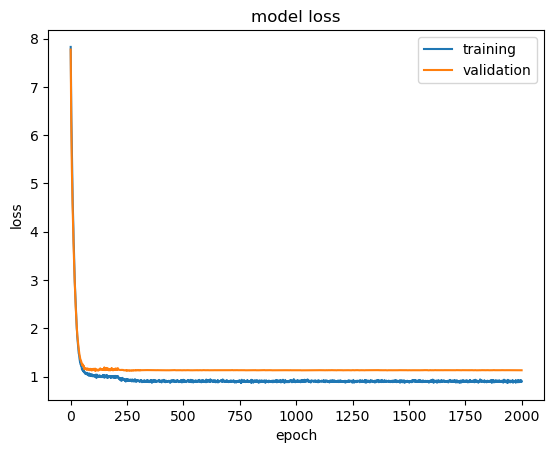

In [56]:
_=plt.plot(history3.history['loss'])
_=plt.plot(history3.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

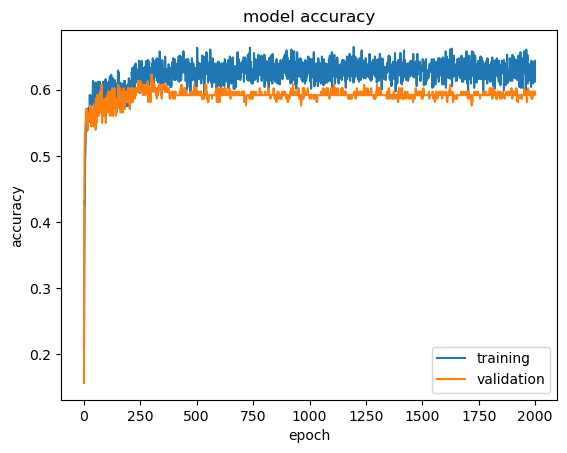

In [57]:
_=plt.plot(history3.history['accuracy'])
_=plt.plot(history3.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

In [58]:
model3.evaluate(x_test_sc,y_test_cat)

13/13 [==============================] - 0s 1ms/step - loss: 1.0232 - accuracy: 0.6152


[1.0232077836990356, 0.6151960492134094]

**Seeing the performance of model3 on training and validation data, it looks like an overfit model**

**Based on our experiments with three models we can conclude that the Model 2 has performed the best, because of the following reasons:**
- The model is not overfit and its training and validation performance is similar
- The model's training and validation performance has converged well for both accuracy and loss

**Plotting the training/validation loss vs epochs for Model2**

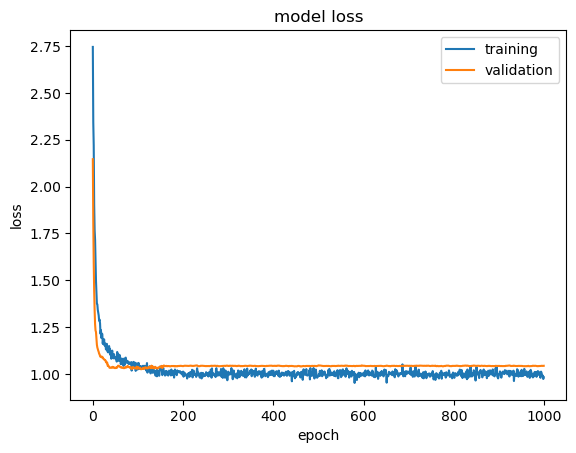

In [59]:
_=plt.plot(history2.history['loss'])
_=plt.plot(history2.history['val_loss'])
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

**Plotting the training/validation Accuracy vs epochs**

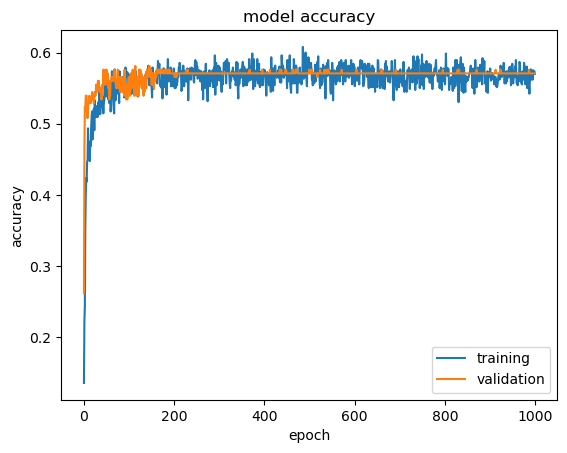

In [60]:
_=plt.plot(history2.history['accuracy'])
_=plt.plot(history2.history['val_accuracy'])
_=plt.title('model accuracy')
_=plt.ylabel('accuracy')
_=plt.xlabel('epoch')
_=plt.legend(['training', 'validation'], loc='best')
_=plt.show()

### Differences between the model1 and model2
- **model 1:**
    - does not use any dropout or batch normalization in the hidden layers
    - has training and validation loss and accuracy that are highly divergent
    - has a test data accuracy of about 54%, whereas the training accuracy is almost 100%
    - is an overfit model as the model performs good on the training data, but not so good on validation and test data
    
- **model 2:**
    - uses 50% dropout and batch normalization in all the hidden layers
    - has similar performance on the traning and validation loss and accuracy
    - has an similar accuracy on training and test data
    - is an appropriately fit model as the model performs equally well on training, validation and test data

### Selected Model: Model 2

In [61]:
# predicting the model on test data
y_pred_cat=model2.predict(x_test_sc)


13/13 [==============================] - 0s 1ms/step


In [62]:
y_pred_cat[0]

array([5.6279928e-06, 6.6024245e-06, 6.2788986e-06, 1.5397695e-03,
       1.8355314e-02, 1.7855126e-01, 5.4350251e-01, 2.3575404e-01,
       2.2278598e-02], dtype=float32)

In [63]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred_cat:
    y_pred_final.append(np.argmax(i))

In [64]:
y_pred_final[0]


6

### Model 2 Performance Summary

### Loss and Accuracy of the model on Test Data

In [65]:
loss,accuracy=model2.evaluate(x_test_sc,y_test_cat)
print(f'Cross Entropy Loss of the model on Test data: {loss:.2f}')
print(f'Accuracy of the model on Test data: {accuracy:.2f}')

13/13 [==============================] - 0s 4ms/step - loss: 0.9026 - accuracy: 0.6103
Cross Entropy Loss of the model on Test data: 0.90
Accuracy of the model on Test data: 0.61


### Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.64      0.74      0.69       175
           6       0.58      0.66      0.62       171
           7       0.60      0.15      0.24        41
           8       0.00      0.00      0.00         3

    accuracy                           0.61       408
   macro avg       0.30      0.26      0.26       408
weighted avg       0.58      0.61      0.58       408



## Confusion Matrix

In [67]:
import string
labels= ['3','4','5','6','7','8']
pred_labels=["Pred "+s for s in labels]

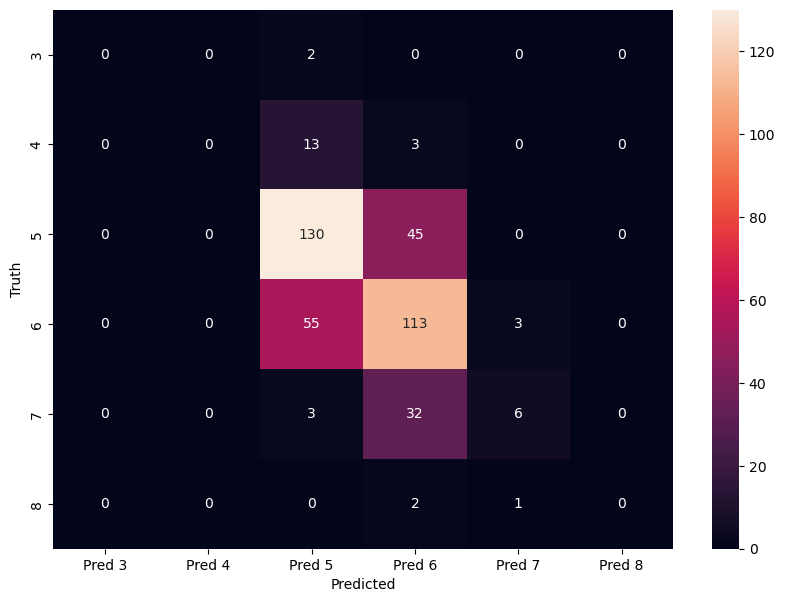

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)
df_cm=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )

_=plt.figure(figsize=(10,7))
_=sns.heatmap(df_cm,annot=True,fmt='d')
_=plt.xlabel('Predicted')
_=plt.ylabel('Truth')
_=plt.show()

### Recall

In [69]:
from sklearn import metrics
Recall = metrics.recall_score(y_test,y_pred_final,average=None)
for i , j in enumerate(Recall):
    print('The Recall of model 2 on test data for Class {0} is : {1:0.2f}'.format(labels[i],j))

The Recall of model 2 on test data for Class 3 is : 0.00
The Recall of model 2 on test data for Class 4 is : 0.00
The Recall of model 2 on test data for Class 5 is : 0.74
The Recall of model 2 on test data for Class 6 is : 0.66
The Recall of model 2 on test data for Class 7 is : 0.15
The Recall of model 2 on test data for Class 8 is : 0.00


### Precision

In [70]:
Precision = metrics.precision_score(y_test,y_pred_final,average=None)
for i , j in enumerate(Precision):
    print('The precision of model 2 on test data for Class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of model 2 on test data for Class 3 is : 0.00
The precision of model 2 on test data for Class 4 is : 0.00
The precision of model 2 on test data for Class 5 is : 0.64
The precision of model 2 on test data for Class 6 is : 0.58
The precision of model 2 on test data for Class 7 is : 0.60
The precision of model 2 on test data for Class 8 is : 0.00


### F1-Score

In [71]:
f1score = metrics.f1_score(y_test,y_pred_final,average=None)
for i , j in enumerate(f1score):
    print('The F1-Score of model 2 on test data for Class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-Score of model 2 on test data for Class 3 is : 0.00
The F1-Score of model 2 on test data for Class 4 is : 0.00
The F1-Score of model 2 on test data for Class 5 is : 0.69
The F1-Score of model 2 on test data for Class 6 is : 0.62
The F1-Score of model 2 on test data for Class 7 is : 0.24
The F1-Score of model 2 on test data for Class 8 is : 0.00


### Observations on the selected Model
- The NN model's performance improved by using normalization techniques Dropout and Batch Normalization
- With Normalization techniques, we could avoid the model being overfit
- Overall the model has an average performance with 61% accuracy
- It has the highest recall value for the most common class 5, followed by 6 and 7. Recall for other classes is 0
- The model has performed poor on the minority classes, because it could not learn from the available little data for these classes
- Since the model has performed well on the majority class, its performance can be improved further if more data points for minority class are available